# Predicting Firms Bankruptcy from Financial Indicators
**Machine Learning Project** <br> 
Group 5 / Winter Semester 2021-2022 <br> 
*MSc Data Analytics & Decision Science | RWTH Business School* <br> 

| Group 5 | Matriculation Number |
| :---: | :---: |
| Karthik Ananthakrishnan | 428859 |
| Ana Aragones| 433641 |
| Cristian Castro | 427372 |
| Tejas Choudekar | 428841 |
| Ajit Kumar Gupta | 429395 |
| Bo Hu | 415101 |


This Project consists of:
 - Data Exploration, Cleaning and Imputation.
 - Feature Selection
 - Model Selection
 - Model Assesment
 - Proposal of a classification model for predicting firm's bankruptcy.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Importing the Dataset and Exploring Features, Missing Values and Outliers

In [2]:
pd.set_option('display.max_rows',65)
pd.set_option('display.max_columns',65)
data = pd.read_csv("bankruptcy.csv")
data.head().round(decimals=2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.17,0.41,0.14,1.35,-28.98,0.60,0.22,1.12,1.20,0.46,0.22,0.53,0.14,0.22,592.24,0.62,2.42,0.22,0.12,37.57,1.00,0.30,0.10,0.76,0.46,0.51,1.97,0.32,5.95,0.22,0.12,100.82,3.62,0.71,0.30,1.81,123140.00,0.46,0.17,0.21,0.04,0.17,95.68,58.11,0.95,0.90,44.94,0.26,0.15,1.35,0.41,0.28,1.05,1.05,127280.0,0.16,0.38,0.84,0.00,9.71,6.28,84.29,4.33,4.03,b'0'
1,0.15,0.46,0.28,1.63,2.60,0.00,0.17,1.17,1.60,0.54,0.18,0.38,0.13,0.17,829.46,0.44,2.17,0.17,0.11,60.95,5.09,0.18,0.09,NaN,0.18,0.38,44.59,1.05,4.08,0.24,0.11,105.09,3.47,3.38,0.04,1.60,NaN,0.54,0.03,0.16,0.07,0.11,149.75,88.80,0.55,1.03,62.68,0.14,0.09,1.59,0.45,0.29,2.00,2.00,3387.8,0.03,0.27,0.90,0.00,5.99,4.11,102.19,3.57,5.95,b'0'
2,0.00,0.23,0.49,3.16,84.87,0.19,0.00,2.99,1.01,0.68,0.00,0.02,0.03,0.00,2094.10,0.17,4.42,0.00,0.00,53.88,0.67,0.04,0.00,0.23,0.68,0.16,0.32,1.71,4.62,0.04,0.00,65.34,5.59,0.18,0.04,1.34,NaN,0.68,0.03,0.84,0.10,0.03,150.13,96.25,0.00,2.33,54.30,0.01,0.00,3.16,0.23,0.18,2.37,2.37,20453.0,0.01,0.00,0.99,0.00,6.77,3.79,64.85,5.63,4.46,b'0'
3,0.02,0.43,0.28,1.78,-10.10,0.57,0.02,1.31,1.05,0.56,0.02,0.07,0.04,0.02,3299.40,0.11,2.31,0.02,0.02,86.32,0.63,0.06,0.02,0.57,0.56,0.11,0.45,0.74,4.26,0.29,0.02,103.81,3.52,0.13,0.06,1.31,3.96,0.65,0.04,0.18,0.18,0.04,158.55,72.24,0.08,0.91,90.71,0.03,0.02,1.45,0.35,0.28,1.51,1.73,5012.6,0.05,0.04,0.95,0.14,4.23,5.05,98.78,3.70,3.48,b'0'
4,0.19,0.42,0.34,1.93,-58.27,0.00,0.23,1.41,1.34,0.58,0.24,0.63,0.19,0.23,602.31,0.61,2.41,0.23,0.17,140.86,1.20,0.23,0.14,0.00,0.57,0.50,44.95,1.19,4.60,0.31,0.18,122.09,2.99,2.66,0.24,1.34,4.55,0.63,0.18,0.01,0.05,0.18,192.45,51.58,0.36,0.53,171.05,0.22,0.16,1.71,0.37,0.33,2.03,2.17,13730.0,0.18,0.32,0.83,0.07,2.59,7.08,100.54,3.63,4.64,b'0'


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

**Comments:** <br>
- All features are numerical and the label is Categorical
- Coding for categorical label: <br>
    - b'0': Non-Bankrupt companies, 
    - b'1': Bankrupt companies


In [4]:
data.describe().round(decimals=2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10503.00,10503.00,10503.00,10485.00,10478.00,10503.00,10503.00,10489.00,10500.00,10503.00,10503.00,10485.00,10460.00,10503.00,10495.00,10489.00,10489.00,10503.00,10460.00,10460.00,9696.00,10503.00,10460.00,10276.00,10503.00,10489.00,9788.00,10275.00,10503.00,10460.00,10460.00,10402.00,10485.00,10489.00,10503.00,10503.00,5767.00,10503.00,10460.00,10485.00,10301.00,10460.00,10460.00,10460.00,9912.00,10485.00,10417.00,10503.00,10460.00,10489.00,10503.00,10417.00,10275.00,10275.00,10503.00,10460.00,10503.00,10474.00,10503.00,9911.00,10486.00,10460.00,10485.00,10275.00
mean,0.05,0.62,0.10,9.98,-1347.66,-0.12,0.07,19.14,1.82,0.37,0.09,2.41,0.38,0.07,3004.33,2.73,20.51,0.07,-0.17,68.45,4.67,0.08,-0.18,0.21,0.20,2.58,1185.95,6.09,3.92,0.46,-0.18,1171.67,8.42,5.40,0.07,1.98,102.70,0.47,-0.08,2.38,28.71,-0.14,195.39,126.94,17.45,8.98,542.49,0.00,-0.22,8.69,0.50,11.24,5.73,6.71,6638.55,-0.53,-0.01,3.85,1.43,571.34,13.94,135.54,9.10,35.77
std,0.65,6.43,6.42,523.69,118580.57,6.97,0.65,717.76,7.58,6.43,0.66,111.46,49.68,0.65,109198.12,110.23,721.81,0.84,11.21,1083.70,305.90,0.58,11.15,2.09,6.74,108.82,34691.23,94.71,0.84,71.76,11.16,68412.70,37.70,69.04,0.57,2.63,2469.45,6.43,8.08,37.82,2845.29,10.79,3303.31,2766.51,1720.34,523.57,31264.16,0.63,11.91,522.53,6.42,851.87,89.71,93.51,59891.96,55.98,18.68,190.20,77.27,37159.67,83.70,25991.16,31.42,428.30
min,-17.69,0.00,-479.73,0.00,-11903000.00,-508.12,-17.69,-2.08,-1.22,-479.73,-17.69,-1543.80,-631.71,-17.69,-2321800.00,-204.30,-0.04,-17.69,-771.65,-0.00,-1.11,-17.69,-771.65,-60.74,-500.75,-204.30,-190130.00,-690.40,-0.36,-6351.70,-771.39,-9295.60,-1.92,-1696.00,-17.07,-0.00,-2.20,-479.73,-551.11,-7.08,-667.73,-765.80,-25113.00,-25113.00,-74385.00,-6.47,-17.30,-17.69,-905.75,0.00,0.00,-25.47,-869.04,-706.49,-751380.00,-5691.70,-1667.30,-198.69,-172.07,0.00,-6.59,-2336500.00,-0.00,-0.00
25%,0.00,0.25,0.02,1.04,-52.07,0.00,0.00,0.43,1.01,0.30,0.01,0.01,0.02,0.00,186.60,0.06,1.45,0.00,0.00,14.25,0.80,0.00,0.00,0.01,0.14,0.06,0.00,0.03,3.39,0.07,0.00,44.72,2.79,0.37,0.00,1.04,1.04,0.43,0.00,0.05,0.02,0.00,65.63,34.21,0.01,0.60,14.94,-0.05,-0.04,0.75,0.18,0.12,0.67,0.95,14.62,0.01,0.01,0.88,0.00,5.53,4.49,40.74,3.06,2.02
50%,0.04,0.46,0.20,1.61,1.58,0.00,0.05,1.11,1.20,0.52,0.07,0.16,0.07,0.05,805.69,0.24,2.15,0.05,0.03,34.43,0.96,0.05,0.03,0.16,0.38,0.21,1.07,0.46,3.93,0.22,0.04,77.52,4.68,2.05,0.05,1.59,2.73,0.63,0.03,0.20,0.08,0.03,99.13,54.42,0.26,1.06,37.10,0.01,0.01,1.23,0.33,0.21,1.20,1.37,882.29,0.05,0.11,0.95,0.00,9.95,6.68,70.66,5.14,4.06
75%,0.12,0.69,0.42,2.96,56.08,0.07,0.14,2.86,2.06,0.73,0.16,0.57,0.13,0.14,2187.10,0.64,3.92,0.14,0.09,63.70,1.11,0.15,0.08,0.37,0.61,0.59,4.81,1.56,4.45,0.43,0.10,129.18,8.08,4.77,0.15,2.38,10.74,0.79,0.09,0.74,0.20,0.09,141.48,80.83,0.95,2.04,69.82,0.10,0.06,2.31,0.53,0.35,2.27,2.44,4348.90,0.13,0.27,1.00,0.24,20.94,10.59,118.22,8.88,9.68
max,52.65,480.73,17.71,53433.00,685440.00,45.53,52.65,53432.00,740.44,11.84,52.65,8259.40,4972.00,52.65,10236000.00,8259.40,53433.00,53.69,123.94,91600.00,29907.00,47.60,123.94,179.92,8.83,8262.30,2723000.00,6233.30,9.62,2940.50,60.43,6674200.00,2787.90,6348.50,47.60,169.50,136090.00,13.66,293.15,2883.00,288770.00,165.95,254030.00,254030.00,113280.00,53433.00,2591100.00,47.60,178.89,53433.00,480.73,84827.00,6234.30,6234.30,3380500.00,293.15,552.64,18118.00,7617.30,3660200.00,4470.40,1073500.00,1974.50,21499.00


**Comments:** <br>
- Data exhibits different counts, this denotes the presence of non-inputed data (NaNs).
- Based on the percentiles and min/max values, the data also has outliers.

b'0'    10008
b'1'      495
Name: class, dtype: int64


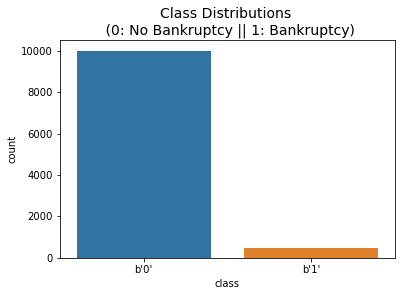

In [5]:
sns.countplot(data=data,x='class')
plt.title('Class Distributions \n (0: No Bankruptcy || 1: Bankruptcy)', fontsize=14);
print(data['class'].value_counts())

**Comments:** <br>
- The dataset is highly imbalanced, in terms of class distribution. 
- The Bankruptcy data represents only ~ 4.7% of the total of the database.

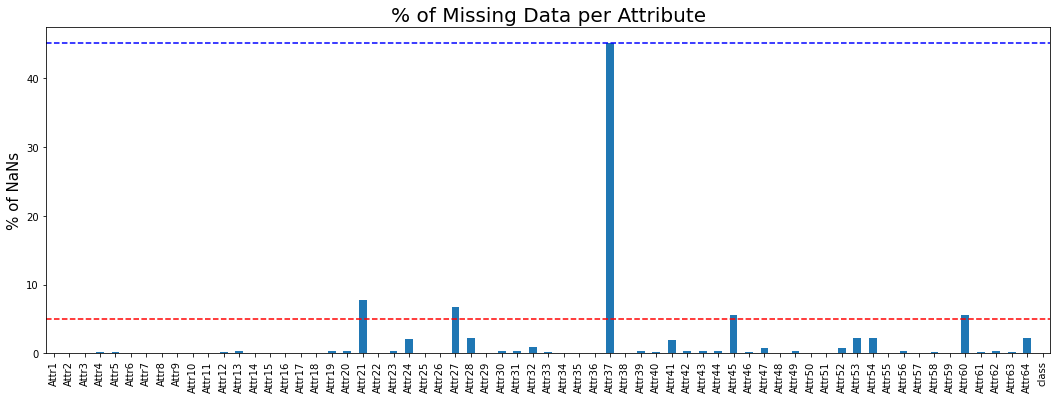

In [6]:
# Plot for identifying NaNs
fig, ax = plt.subplots(1,1,figsize = (18,6))
miss_per = ((data.isnull().sum())*100/len(data["Attr1"]))

miss_per.plot(kind="bar")
                
ax = plt.axhline(y=5,color='r',linestyle = '--')
ax = plt.axhline(y=45,color='b',linestyle = '--')
plt.title('% of Missing Data per Attribute', fontsize=20)
plt.ylabel('% of NaNs', fontsize=15)
plt.show()

**Comments:** <br>
- The bar plot shows that 5 attributes exhibit more than 5% of missing data (NaNs).
- These attributes are: Attr21, Attr27, Attr37, Attr45 and Attr60.
- In particular, the NaNs dominate in Attr37 with a total of 45% missing data. This magnitude makes Attr37 hard to handle, in terms of data inputation.
- Based on this, Attr37 will not be considered as feature.



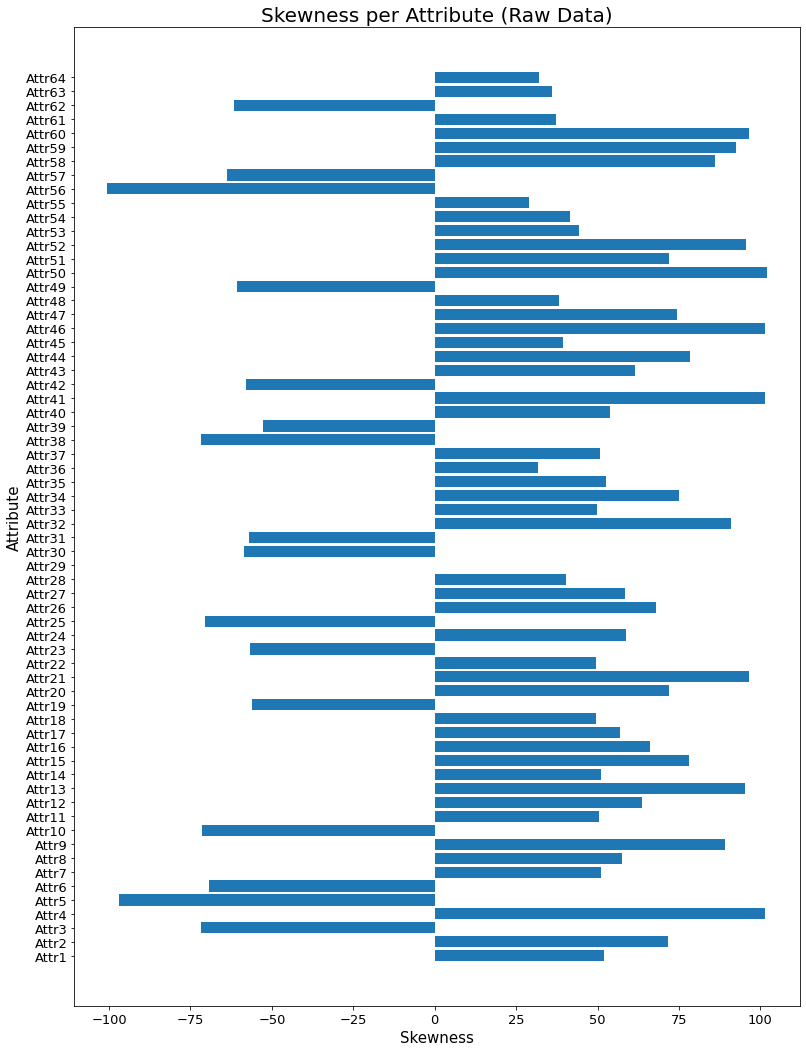

In [8]:
# Describe the Skewness in the Raw Data
labels_  = data.loc[:, data.columns != 'class'].columns.values
skew_    =data[labels_].skew().values

# Graphically
plt.figure(figsize=(13,18))
plt.barh(labels_,skew_)
plt.plot(-1,0,"--")
plt.title('Skewness per Attribute (Raw Data)', fontsize=20)
plt.ylabel('Attribute', fontsize=15)
plt.xlabel('Skewness', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

**Comments:** <br>
- All of the features exhibit great skewness.
- Due to the lack of "Normal Distribution Shape", the NaNs will be replaced using the median.

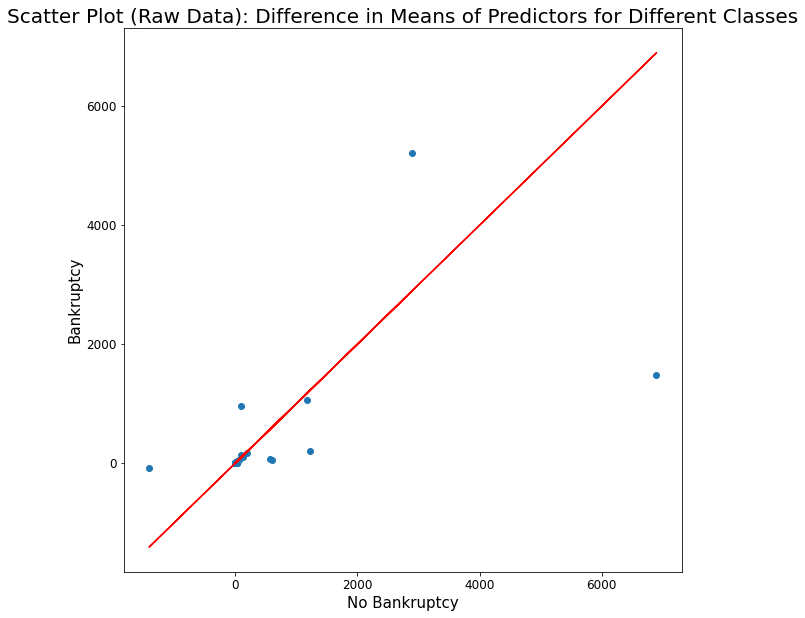

In [14]:
# Check if the different classes (Bankruptcy and No-Bankruptcy) have the same mean in their features
b0 = data[data["class"]=="b'0'"].mean()
b1 = data[data["class"]=="b'1'"].mean()

plt.figure(figsize=(10,10))
plt.scatter(b0,b1)
plt.plot(b0, b0, '-', color = 'r')
plt.title('Scatter Plot (Raw Data): Difference in Means of Predictors for Different Classes', fontsize=20)
plt.ylabel("Bankruptcy", fontsize=15)
plt.xlabel("No Bankruptcy", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

**Comments:** <br>
- As can be seen above, the means of the predictors are different for some predictores in each class. 
- This must be taken into consideration when inputing data.
- The inputation will be done per class, instead of using the entire dataset.

#### Replacing Missing Data
This will be done replacing the NaNs by the median of each predictor, for each class separately.

In [15]:
# Inputing data
df = data.copy(deep=True)
df = df.drop(columns=["Attr37"],axis=1)

In [16]:
df_class0 = df[df["class"] == "b'0'"]                    # Seperating the data on the basis of class
df_class1 = df[df["class"] == "b'1'"]

df_class0 = df_class0.drop('class', axis = 1)
df_class1 = df_class1.drop('class', axis = 1)

df_class0 = df_class0.fillna(df_class0.median())       # Filling the missing values with median of class = b'0' (Non-Bankruptcy)
df_class1 = df_class1.fillna(df_class1.median())       # Filling the missing values with median of class = b'1' (Bankruptcy)

In [17]:
# Check for Class 0: No-Bankruptcy
df_class0.describe().round(decimals=2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00,10008.00
mean,0.06,0.57,0.14,10.21,-1406.99,-0.07,0.07,19.87,1.82,0.42,0.09,2.68,0.39,0.07,2893.47,2.86,21.25,0.08,-0.18,68.70,4.55,0.08,-0.18,0.23,0.25,2.70,1153.21,6.06,3.93,0.33,-0.19,1166.42,8.23,5.45,0.08,1.97,0.52,-0.07,2.35,29.55,-0.15,196.63,127.89,17.31,9.23,561.40,0.01,-0.22,8.93,0.45,11.67,5.72,6.71,6893.99,-0.55,0.02,3.98,1.44,564.12,14.02,94.78,9.10,35.14
std,0.62,4.84,4.83,535.92,121332.95,5.22,0.62,734.74,7.75,4.84,0.63,113.03,50.78,0.62,110624.28,112.85,738.89,0.82,11.45,1107.77,301.09,0.58,11.39,2.08,5.09,111.40,34299.00,95.61,0.84,72.68,11.40,69639.95,26.54,70.59,0.58,2.58,4.84,8.26,37.90,2886.64,11.03,3374.66,2825.44,1712.07,535.84,31896.42,0.63,12.18,534.86,4.83,869.10,90.71,94.58,61139.27,57.23,18.97,194.58,79.06,36979.15,85.61,26327.23,29.43,431.83
min,-17.69,0.00,-479.73,0.00,-11903000.00,-508.12,-17.69,-2.08,-1.22,-479.73,-17.69,-274.57,-631.71,-17.69,-2321800.00,-204.30,-0.04,-17.69,-771.65,-0.00,-1.11,-17.69,-771.65,-60.74,-500.75,-204.30,-190130.00,-690.40,-0.36,-6351.70,-771.39,-9295.60,-1.92,-1696.00,-17.07,-0.00,-479.73,-551.11,-7.08,-667.73,-765.80,-25113.00,-25113.00,-74385.00,-6.47,-17.30,-17.69,-905.75,0.00,0.00,-25.47,-869.04,-706.49,-751380.00,-5691.70,-1667.30,-198.69,-172.07,0.00,-6.59,-2336500.00,-0.00,-0.00
25%,0.00,0.25,0.02,1.06,-49.22,0.00,0.00,0.45,1.01,0.31,0.01,0.01,0.02,0.00,200.36,0.07,1.48,0.00,0.00,14.42,0.81,0.00,0.00,0.03,0.15,0.06,0.02,0.05,3.40,0.07,0.01,44.42,2.83,0.38,0.00,1.04,0.44,0.00,0.06,0.02,0.00,65.83,34.56,0.02,0.62,15.27,-0.05,-0.03,0.76,0.17,0.12,0.70,0.98,33.25,0.01,0.01,0.87,0.00,5.78,4.49,40.30,3.13,2.06
50%,0.05,0.46,0.21,1.65,3.28,0.00,0.05,1.15,1.20,0.53,0.07,0.17,0.07,0.05,800.90,0.25,2.19,0.05,0.03,34.29,0.96,0.06,0.03,0.17,0.39,0.23,1.07,0.48,3.94,0.21,0.04,76.32,4.74,2.07,0.06,1.58,0.64,0.04,0.20,0.08,0.04,98.86,54.45,0.28,1.09,37.07,0.01,0.01,1.26,0.32,0.21,1.22,1.39,938.14,0.05,0.11,0.95,0.00,10.02,6.67,69.30,5.23,4.06
75%,0.13,0.68,0.43,3.02,58.48,0.08,0.15,2.93,2.06,0.73,0.16,0.59,0.14,0.15,2140.32,0.67,4.00,0.15,0.09,63.04,1.09,0.15,0.08,0.38,0.62,0.61,4.42,1.54,4.45,0.41,0.10,125.93,8.18,4.83,0.15,2.37,0.79,0.09,0.77,0.19,0.09,140.65,80.63,0.91,2.09,69.26,0.10,0.06,2.36,0.51,0.35,2.26,2.42,4513.60,0.13,0.27,0.99,0.24,19.93,10.51,115.47,9.02,9.45
max,52.65,480.73,17.71,53433.00,685440.00,45.53,52.65,53432.00,740.44,11.84,52.65,8259.40,4972.00,52.65,10236000.00,8259.40,53433.00,53.69,123.94,91600.00,29907.00,47.60,123.94,179.92,8.83,8262.30,2723000.00,6233.30,9.62,2940.50,60.43,6674200.00,1696.00,6348.50,47.60,169.50,13.66,293.15,2883.00,288770.00,165.95,254030.00,254030.00,113280.00,53433.00,2591100.00,47.60,178.89,53433.00,480.73,84827.00,6234.30,6234.30,3380500.00,293.15,552.64,18118.00,7617.30,3660200.00,4470.40,1073500.00,1974.50,21499.00


In [18]:
# Check for Class 1: Bankruptcy
df_class1.describe().round(decimals=2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00,495.00
mean,-0.03,1.65,-0.89,5.09,-79.88,-1.16,-0.02,3.93,1.77,-0.67,0.01,-3.19,0.06,-0.02,5210.25,0.12,4.99,-0.02,0.01,60.42,1.03,-0.03,0.01,-0.10,-0.92,0.07,136.16,4.17,3.80,3.06,0.03,1054.52,12.22,4.35,-0.04,2.22,-0.56,-0.10,2.85,0.06,-0.05,161.95,101.47,-0.15,3.51,72.26,-0.07,-0.10,3.55,1.48,0.64,3.85,4.21,1473.91,-0.06,-0.80,1.05,1.28,45.78,11.88,954.00,8.78,33.74
std,1.05,20.07,20.05,48.27,426.11,21.88,1.05,42.37,2.00,20.06,1.04,69.51,2.08,1.05,73481.82,3.75,42.37,1.05,2.07,78.46,0.76,0.58,2.07,1.84,20.98,3.37,3620.24,37.25,0.83,44.79,2.06,17350.42,126.01,15.65,0.29,3.49,20.07,0.50,35.47,3.77,0.68,576.07,571.81,17.38,35.73,375.70,0.58,0.81,41.39,20.07,2.84,26.03,26.09,22542.97,0.80,11.35,0.74,18.29,291.84,15.78,16162.79,58.34,195.20
min,-9.74,0.00,-445.88,0.00,-4111.30,-486.72,-9.74,-1.00,0.00,-445.86,-8.94,-1543.80,-2.72,-9.74,-602360.00,-46.67,0.00,-9.74,-5.27,0.00,0.01,-9.74,-5.27,-38.57,-466.29,-46.67,-17235.00,-40.79,0.94,-2.19,-3.18,0.13,0.02,-12.71,-2.63,0.00,-445.86,-7.76,-0.04,-58.52,-3.49,0.00,0.00,-206.41,-0.04,0.00,-9.74,-8.21,0.00,0.00,0.00,-39.78,-39.78,-146580.00,-13.29,-177.85,0.00,-94.60,0.00,0.00,0.00,0.00,0.00
25%,-0.08,0.45,-0.12,0.79,-90.08,-0.10,-0.08,0.16,0.94,0.14,-0.06,-0.19,-0.04,-0.08,-1428.10,-0.07,1.17,-0.08,-0.07,13.89,0.85,-0.06,-0.07,-0.10,-0.04,-0.07,-0.29,-0.27,3.30,0.17,-0.06,62.16,2.14,0.19,-0.10,1.05,0.24,-0.08,0.03,-0.10,-0.06,65.15,29.33,-0.45,0.30,12.94,-0.11,-0.10,0.58,0.30,0.16,0.35,0.63,-670.50,-0.05,-0.12,0.92,0.00,4.64,4.39,61.08,2.02,2.01
50%,0.00,0.67,0.06,1.14,-31.59,0.00,0.01,0.48,1.12,0.32,0.02,0.01,0.02,0.01,1085.10,0.05,1.50,0.01,0.00,40.65,0.95,0.02,0.00,0.01,0.18,0.04,0.87,0.12,3.87,0.34,0.01,109.64,3.51,1.74,0.01,1.69,0.44,0.00,0.07,0.11,0.01,104.04,52.15,0.02,0.59,38.20,-0.01,-0.01,0.89,0.50,0.29,0.79,1.02,133.98,0.02,0.03,0.98,0.00,8.09,6.97,104.10,3.48,4.19
75%,0.05,0.86,0.26,1.68,8.19,0.00,0.05,1.12,2.14,0.52,0.08,0.12,0.06,0.05,3990.00,0.17,2.18,0.05,0.03,78.45,1.06,0.07,0.03,0.12,0.37,0.15,1.52,0.92,4.36,0.62,0.04,179.55,6.06,3.67,0.07,2.58,0.64,0.04,0.30,0.30,0.05,155.46,81.82,0.20,1.05,74.88,0.04,0.02,1.30,0.72,0.47,1.56,1.74,1527.10,0.08,0.23,1.05,0.32,16.42,12.29,176.06,5.91,9.53
max,20.48,446.88,1.00,916.50,2586.50,0.91,20.48,915.50,31.42,1.00,20.48,65.54,45.11,20.48,1379200.00,65.46,916.50,20.48,45.11,663.60,11.72,5.82,45.11,1.72,0.99,54.58,78115.00,689.98,6.26,984.00,45.11,385260.00,2787.90,278.83,1.06,64.18,1.00,0.29,569.33,39.23,12.82,12523.00,12523.00,251.28,577.50,8281.80,5.82,12.82,916.50,446.88,58.56,420.92,420.92,354620.00,1.00,29.55,14.30,379.17,5500.00,144.69,359250.00,1266.20,3544.60


#### Checking and Deleting Duplicates
Duplicates will be deleted from each class. This considered duplicated observations (in all the features).

In [19]:
df_class0 = df_class0.drop_duplicates()
df_class0.describe().round(decimals=2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00
mean,0.06,0.57,0.14,10.26,-1419.46,-0.07,0.07,17.02,1.83,0.42,0.09,2.67,0.39,0.07,2921.32,2.84,18.41,0.08,-0.19,68.68,4.58,0.08,-0.19,0.23,0.25,2.68,1163.08,6.10,3.92,0.33,-0.19,1175.23,8.25,5.48,0.08,1.97,0.51,-0.08,2.36,29.80,-0.15,196.03,127.30,17.39,9.29,564.61,0.01,-0.22,8.98,0.45,11.77,5.75,6.75,6827.32,-0.56,0.02,4.01,1.44,568.81,14.09,94.53,9.13,35.38
std,0.62,4.86,4.85,538.21,121851.48,5.25,0.63,675.31,7.79,4.86,0.63,113.44,51.00,0.63,111083.62,113.26,679.85,0.83,11.48,1112.31,302.38,0.58,11.42,2.09,5.11,111.81,34445.43,96.02,0.84,72.99,11.43,69937.55,26.65,70.89,0.58,2.59,4.86,8.29,38.06,2898.98,11.07,3387.36,2835.53,1719.37,538.13,32032.58,0.63,12.23,537.14,4.85,872.81,91.10,94.98,61178.68,57.47,19.05,195.41,79.39,37137.17,85.97,26439.75,29.55,433.66
min,-17.69,0.00,-479.73,0.00,-11903000.00,-508.12,-17.69,-2.08,-1.22,-479.73,-17.69,-274.57,-631.71,-17.69,-2321800.00,-204.30,-0.04,-17.69,-771.65,-0.00,-1.11,-17.69,-771.65,-60.74,-500.75,-204.30,-190130.00,-690.40,-0.36,-6351.70,-771.39,-9295.60,-1.92,-1696.00,-17.07,-0.00,-479.73,-551.11,-7.08,-667.73,-765.80,-25113.00,-25113.00,-74385.00,-6.47,-17.30,-17.69,-905.75,0.00,0.00,-25.47,-869.04,-706.49,-751380.00,-5691.70,-1667.30,-198.69,-172.07,0.00,-6.59,-2336500.00,-0.00,-0.00
25%,0.00,0.25,0.02,1.06,-49.35,0.00,0.00,0.45,1.01,0.31,0.01,0.01,0.02,0.00,199.97,0.07,1.47,0.00,0.00,14.27,0.81,0.00,0.00,0.03,0.15,0.06,0.02,0.05,3.39,0.07,0.01,44.35,2.83,0.38,0.00,1.05,0.44,0.00,0.06,0.02,0.00,65.63,34.48,0.02,0.62,15.15,-0.05,-0.03,0.76,0.17,0.12,0.70,0.98,33.64,0.01,0.01,0.87,0.00,5.79,4.50,40.19,3.13,2.06
50%,0.05,0.46,0.21,1.65,3.28,0.00,0.05,1.15,1.20,0.52,0.07,0.17,0.07,0.05,801.96,0.25,2.19,0.05,0.03,34.29,0.96,0.06,0.03,0.17,0.39,0.23,1.07,0.48,3.93,0.21,0.04,76.32,4.74,2.08,0.06,1.59,0.64,0.04,0.20,0.08,0.04,98.86,54.45,0.28,1.09,37.07,0.01,0.01,1.26,0.32,0.21,1.22,1.39,927.95,0.05,0.11,0.95,0.00,10.02,6.67,69.30,5.23,4.06
75%,0.13,0.68,0.43,3.02,58.64,0.08,0.15,2.92,2.06,0.73,0.16,0.59,0.14,0.15,2144.40,0.67,3.99,0.15,0.09,62.98,1.09,0.15,0.08,0.38,0.62,0.61,4.44,1.55,4.45,0.41,0.10,125.90,8.19,4.85,0.15,2.38,0.79,0.09,0.77,0.19,0.09,140.62,80.50,0.91,2.09,69.16,0.10,0.06,2.35,0.51,0.35,2.26,2.42,4462.80,0.13,0.27,0.99,0.24,19.98,10.55,115.41,9.03,9.48
max,52.65,480.73,17.71,53433.00,685440.00,45.53,52.65,53432.00,740.44,11.84,52.65,8259.40,4972.00,52.65,10236000.00,8259.40,53433.00,53.69,123.94,91600.00,29907.00,47.60,123.94,179.92,8.83,8262.30,2723000.00,6233.30,9.62,2940.50,60.43,6674200.00,1696.00,6348.50,47.60,169.50,13.66,293.15,2883.00,288770.00,165.95,254030.00,254030.00,113280.00,53433.00,2591100.00,47.60,178.89,53433.00,480.73,84827.00,6234.30,6234.30,3380500.00,293.15,552.64,18118.00,7617.30,3660200.00,4470.40,1073500.00,1974.50,21499.00


In [20]:
df_class1 = df_class1.drop_duplicates()
df_class1.describe().round(decimals=2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00,493.00
mean,-0.03,1.65,-0.90,5.11,-80.01,-1.16,-0.02,3.94,1.78,-0.67,0.01,-3.20,0.06,-0.02,5229.35,0.12,4.99,-0.02,0.01,60.39,1.03,-0.03,0.01,-0.10,-0.93,0.08,136.76,4.19,3.80,3.07,0.03,1019.94,12.26,4.36,-0.04,2.23,-0.56,-0.10,2.86,0.06,-0.05,161.62,101.16,-0.14,3.52,72.33,-0.07,-0.09,3.56,1.49,0.64,3.86,4.23,1479.10,-0.07,-0.80,1.05,1.28,45.94,11.91,956.89,8.80,33.86
std,1.05,20.11,20.09,48.36,426.97,21.93,1.06,42.46,2.00,20.11,1.04,69.65,2.08,1.06,73630.39,3.75,42.46,1.06,2.08,78.61,0.76,0.58,2.08,1.84,21.02,3.38,3627.58,37.32,0.83,44.88,2.07,17366.65,126.26,15.68,0.29,3.50,20.11,0.50,35.54,3.78,0.68,577.15,572.89,17.42,35.80,376.46,0.58,0.81,41.47,20.11,2.85,26.08,26.14,22588.60,0.80,11.38,0.74,18.33,292.42,15.81,16195.54,58.46,195.58
min,-9.74,0.00,-445.88,0.00,-4111.30,-486.72,-9.74,-1.00,0.00,-445.86,-8.94,-1543.80,-2.72,-9.74,-602360.00,-46.67,0.00,-9.74,-5.27,0.00,0.01,-9.74,-5.27,-38.57,-466.29,-46.67,-17235.00,-40.79,0.94,-2.19,-3.18,0.13,0.02,-12.71,-2.63,0.00,-445.86,-7.76,-0.04,-58.52,-3.49,0.00,0.00,-206.41,-0.04,0.00,-9.74,-8.21,0.00,0.00,0.00,-39.78,-39.78,-146580.00,-13.29,-177.85,0.00,-94.60,0.00,0.00,0.00,0.00,0.00
25%,-0.08,0.45,-0.13,0.79,-90.21,-0.10,-0.08,0.16,0.94,0.14,-0.06,-0.19,-0.04,-0.08,-1440.50,-0.07,1.16,-0.08,-0.07,13.84,0.85,-0.06,-0.07,-0.10,-0.04,-0.07,-0.29,-0.27,3.30,0.17,-0.06,62.01,2.14,0.18,-0.10,1.05,0.24,-0.08,0.02,-0.10,-0.06,64.96,29.20,-0.44,0.30,12.92,-0.11,-0.10,0.58,0.30,0.16,0.35,0.63,-676.00,-0.05,-0.12,0.92,0.00,4.63,4.41,60.67,2.03,2.02
50%,0.00,0.67,0.06,1.14,-31.59,0.00,0.01,0.48,1.12,0.32,0.02,0.01,0.02,0.01,1085.10,0.05,1.50,0.01,0.00,40.65,0.95,0.02,0.00,0.01,0.18,0.04,0.87,0.12,3.87,0.34,0.01,109.64,3.52,1.72,0.01,1.69,0.44,0.00,0.07,0.11,0.01,104.04,52.15,0.02,0.60,38.20,-0.01,-0.01,0.89,0.50,0.29,0.79,1.02,133.98,0.02,0.03,0.98,0.00,8.09,6.97,104.10,3.48,4.19
75%,0.05,0.86,0.26,1.68,8.21,0.00,0.05,1.12,2.14,0.52,0.08,0.12,0.06,0.05,4029.20,0.17,2.16,0.05,0.03,78.69,1.06,0.07,0.03,0.12,0.37,0.15,1.50,0.92,4.36,0.61,0.04,178.18,6.09,3.68,0.07,2.59,0.63,0.04,0.30,0.30,0.04,154.98,81.47,0.20,1.05,74.73,0.04,0.02,1.30,0.72,0.47,1.56,1.78,1566.00,0.08,0.23,1.05,0.32,16.47,12.32,175.79,5.94,9.55
max,20.48,446.88,1.00,916.50,2586.50,0.91,20.48,915.50,31.42,1.00,20.48,65.54,45.11,20.48,1379200.00,65.46,916.50,20.48,45.11,663.60,11.72,5.82,45.11,1.72,0.99,54.58,78115.00,689.98,6.26,984.00,45.11,385260.00,2787.90,278.83,1.06,64.18,1.00,0.29,569.33,39.23,12.82,12523.00,12523.00,251.28,577.50,8281.80,5.82,12.82,916.50,446.88,58.56,420.92,420.92,354620.00,1.00,29.55,14.30,379.17,5500.00,144.69,359250.00,1266.20,3544.60


#### Approach for Outliers
- Due to the nature of the data, which is characterised by high skewness presumly because of the diversity of scale and financial status of many different kind of companies, it was decided to preserve this nature when treating outliers. 
- By modifying the magnitude of the outliers rather than suppressing their existence, it was tried to keep the ability of the different predictors to describe the amount of diversity of companies within the dataset.
- Based on the above, the adopted procedure for outliers was the following:
    - The IQR method was adopted,
    - When the outliers are greater than Q3+1.5$*$IQR, they are replaced by Q3+1.5$*$IQR.
    - When the outliers are lower than Q1-1.5$*$IQR, they are replaced by Q1-1.5$*$IQR.

- Considering this approach, **two different datasets are going to be held: one with outliers and another one with treated outliers.**  

In [21]:
# Base Case with Outliers
df_class0_base = df_class0.copy(deep=True)
df_class1_base = df_class1.copy(deep=True)
df_class0_base["class"] = 0
df_class1_base["class"] = 1
data_base = pd.concat([df_class0_base,df_class1_base])

**data_base:** A dataset that has no missing values nor duplicates, but contains all outliers intact.

In [22]:
# Treating Outliers

# Function for treating outliers
def Remove_Outliers(data):
    variables = [c for c in data.columns if c!="class"]

    for variable in variables:
        Q1 = data[variable].quantile([0.25]).values[0]
        Q3 = data[variable].quantile([0.75]).values[0]
        IQR = [Q1 - 1.5*(Q3-Q1) ,Q3 + 1.5*(Q3-Q1) ]
        data.loc[data[variable] > IQR[1],variable] = IQR[1]
        data.loc[data[variable] < IQR[0],variable] = IQR[0]
    return data

# Removing the Outliers
df_class0 = Remove_Outliers(df_class0)
df_class1 = Remove_Outliers(df_class1)

df_class0["class"] = 0
df_class1["class"] = 1

Bdata = pd.concat([df_class0,df_class1])
Bdata.describe().round(decimals=2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00
mean,0.05,0.50,0.21,2.24,3.14,0.02,0.07,1.96,1.59,0.49,0.08,0.30,0.08,0.07,1174.28,0.41,3.01,0.07,0.04,44.69,0.96,0.07,0.03,0.20,0.35,0.37,2.42,0.93,3.92,0.27,0.05,96.62,6.02,3.25,0.07,1.82,0.58,0.04,0.50,0.11,0.04,109.84,61.47,0.45,1.52,48.77,0.02,0.01,1.74,0.38,0.26,1.61,1.82,2322.98,0.07,0.14,0.94,0.14,14.82,8.28,88.48,6.65,6.91,0.05
std,0.12,0.31,0.32,1.69,109.02,0.10,0.14,2.13,0.91,0.31,0.14,0.58,0.11,0.14,2312.02,0.56,2.16,0.14,0.09,38.99,0.25,0.14,0.08,0.31,0.36,0.52,4.67,1.42,0.82,0.31,0.10,69.49,4.42,3.53,0.14,1.08,0.26,0.09,0.62,0.19,0.09,61.64,37.59,0.93,1.27,43.18,0.15,0.10,1.38,0.26,0.19,1.48,1.38,4447.39,0.12,0.27,0.12,0.24,12.52,5.32,64.30,4.89,6.67,0.21
min,-0.26,0.00,-0.70,0.00,-237.84,-0.25,-0.28,-2.08,-0.56,-0.44,-0.27,-0.87,-0.18,-0.28,-9645.05,-0.83,-0.04,-0.28,-0.22,-0.00,0.39,-0.27,-0.22,-0.50,-0.66,-0.76,-6.61,-2.20,1.72,-0.49,-0.20,-77.99,-1.92,-6.32,-0.35,-0.00,-0.36,-0.26,-1.01,-0.71,-0.21,-46.85,-34.56,-1.42,-1.58,-17.30,-0.33,-0.29,0.00,0.00,-0.21,-1.64,-1.20,-6610.11,-0.23,-0.65,0.69,-0.49,0.00,-4.57,-72.65,-0.00,-0.00,0.00
25%,0.00,0.25,0.02,1.04,-52.01,0.00,0.00,0.43,1.01,0.30,0.01,0.01,0.02,0.00,186.71,0.06,1.45,0.00,0.00,14.26,0.81,0.00,0.00,0.02,0.13,0.06,0.01,0.04,3.39,0.07,0.00,45.04,2.79,0.38,0.00,1.05,0.43,0.00,0.05,0.02,0.00,65.62,34.20,0.01,0.60,15.02,-0.05,-0.04,0.75,0.18,0.12,0.68,0.96,14.84,0.01,0.01,0.88,0.00,5.74,4.49,40.85,3.07,2.06,0.00
50%,0.04,0.46,0.20,1.61,1.80,0.00,0.05,1.11,1.20,0.51,0.07,0.16,0.07,0.05,806.06,0.24,2.15,0.05,0.03,34.30,0.96,0.05,0.03,0.17,0.38,0.21,1.07,0.48,3.93,0.22,0.04,76.80,4.69,2.07,0.05,1.59,0.63,0.03,0.20,0.08,0.04,98.86,54.44,0.28,1.06,37.07,0.01,0.01,1.23,0.33,0.21,1.22,1.39,875.86,0.05,0.11,0.95,0.00,10.02,6.68,70.39,5.15,4.06,0.00
75%,0.12,0.69,0.42,2.95,56.13,0.07,0.14,2.76,2.07,0.72,0.16,0.56,0.13,0.14,2190.93,0.63,3.82,0.14,0.09,63.52,1.09,0.15,0.08,0.37,0.61,0.57,4.19,1.52,4.45,0.43,0.10,128.49,8.08,4.79,0.15,2.39,0.79,0.09,0.72,0.19,0.09,140.95,80.59,0.88,2.04,69.52,0.10,0.06,2.30,0.53,0.35,2.23,2.40,4269.88,0.13,0.27,1.00,0.24,19.87,10.63,117.98,8.88,9.50,0.00
max,0.32,1.47,1.03,5.95,220.62,0.20,0.36,6.63,3.94,1.37,0.39,1.47,0.31,0.36,12233.75,1.57,7.76,0.36,0.22,175.97,1.51,0.37,0.19,0.91,1.33,1.43,11.06,3.80,6.03,1.28,0.24,352.44,16.22,11.56,0.37,4.89,1.32,0.23,1.84,0.90,0.23,290.02,159.89,2.25,4.29,167.44,0.33,0.21,4.74,1.33,0.92,4.60,4.59,11106.54,0.32,0.76,1.23,0.81,41.27,24.19,348.48,17.89,20.85,1.00


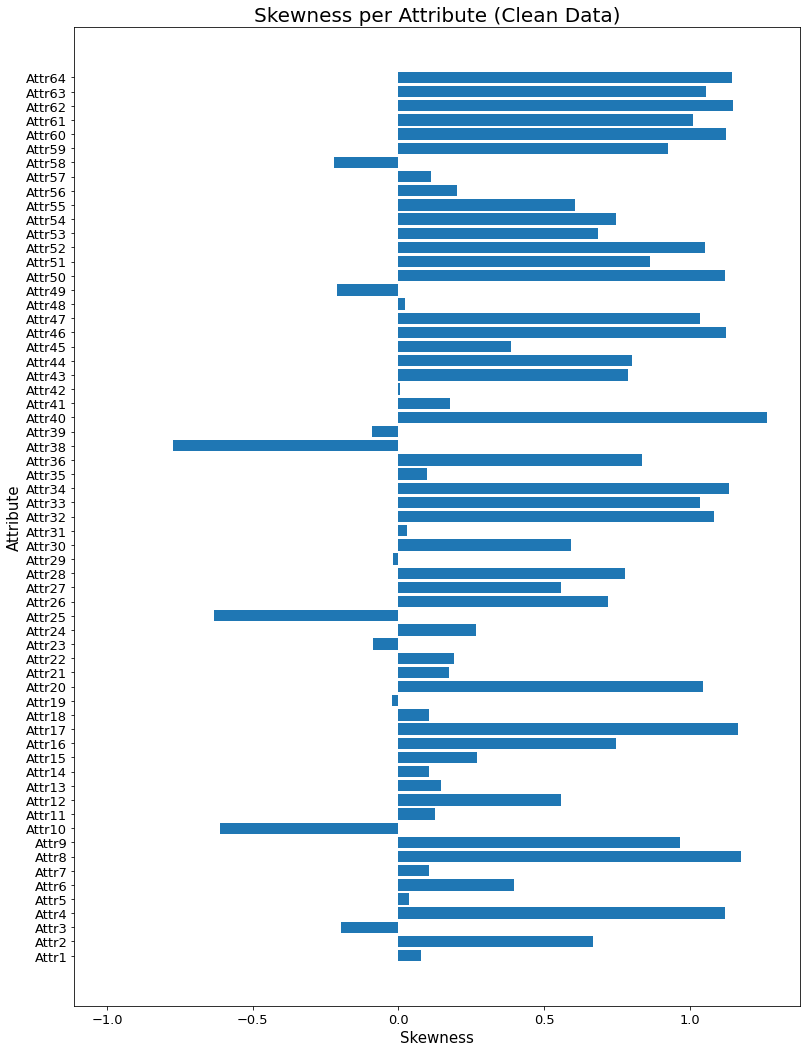

In [23]:
# Checking again for Skewness in data without outliers, NaNs or duplicates
labels_  = Bdata.loc[:, Bdata.columns != 'class'].columns.values
skew_    = Bdata.loc[:, Bdata.columns != 'class'].skew().values

# Graphically
plt.figure(figsize=(13,18))
plt.barh(labels_,skew_)
plt.plot(-1,0,"--")
plt.title('Skewness per Attribute (Clean Data)', fontsize=20)
plt.ylabel('Attribute', fontsize=15)
plt.xlabel('Skewness', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

**Comments:** <br>
- It can be seen that the skewness is in a more acceptable way to be worked with.
- A baseline model is built to assess whether **the dataset with outliers provides more information than the dataset without the outliers**, in order to make a decision.

## 2. Baseline Model: Exploratory Analysis and Feature Section with Outliers

A baseline model is built to assess whether the dataset **with** outliers provides **more information** than the dataset ***without** outliers. For this, four classification methods were considered:
- Logistic Regression
- KNeighbours Classifier
- Support Vector Classfier
- Random Forest Classifier

In [24]:
## Importing Libraries

from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score,confusion_matrix


from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import StratifiedKFold





In [25]:
data_base_fp = data_base.copy(deep=True)

In [26]:
data_base_fp.describe().round(decimals=2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00,10416.00
mean,0.05,0.62,0.09,10.02,-1356.06,-0.12,0.07,16.40,1.82,0.36,0.09,2.39,0.37,0.07,3030.56,2.71,17.77,0.07,-0.18,68.29,4.41,0.08,-0.18,0.21,0.19,2.56,1114.50,6.01,3.92,0.46,-0.18,1167.88,8.44,5.42,0.07,1.99,0.46,-0.08,2.38,28.39,-0.14,194.40,126.07,16.56,9.01,541.31,0.00,-0.22,8.72,0.50,11.24,5.66,6.63,6574.19,-0.53,-0.02,3.87,1.44,544.06,13.98,135.35,9.11,35.31,0.05
std,0.65,6.45,6.45,525.42,118932.94,7.00,0.65,659.21,7.61,6.46,0.66,111.76,49.78,0.65,109598.43,110.55,663.63,0.84,11.22,1085.80,295.14,0.58,11.16,2.08,6.77,109.14,33630.25,94.07,0.84,71.91,11.16,68366.50,37.82,69.28,0.57,2.64,6.45,8.10,37.94,2829.54,10.81,3308.61,2770.41,1678.19,525.30,31265.53,0.63,11.94,524.36,6.45,851.91,89.10,92.88,59925.42,56.10,18.76,190.73,77.59,36247.79,83.98,26046.00,31.52,425.40,0.21
min,-17.69,0.00,-479.73,0.00,-11903000.00,-508.12,-17.69,-2.08,-1.22,-479.73,-17.69,-1543.80,-631.71,-17.69,-2321800.00,-204.30,-0.04,-17.69,-771.65,-0.00,-1.11,-17.69,-771.65,-60.74,-500.75,-204.30,-190130.00,-690.40,-0.36,-6351.70,-771.39,-9295.60,-1.92,-1696.00,-17.07,-0.00,-479.73,-551.11,-7.08,-667.73,-765.80,-25113.00,-25113.00,-74385.00,-6.47,-17.30,-17.69,-905.75,0.00,0.00,-25.47,-869.04,-706.49,-751380.00,-5691.70,-1667.30,-198.69,-172.07,0.00,-6.59,-2336500.00,-0.00,-0.00,0.00
25%,0.00,0.25,0.02,1.04,-52.01,0.00,0.00,0.43,1.01,0.30,0.01,0.01,0.02,0.00,186.71,0.06,1.45,0.00,0.00,14.26,0.81,0.00,0.00,0.02,0.13,0.06,0.01,0.04,3.39,0.07,0.00,45.04,2.79,0.38,0.00,1.05,0.43,0.00,0.05,0.02,0.00,65.62,34.20,0.01,0.60,15.02,-0.05,-0.04,0.75,0.18,0.12,0.68,0.96,14.84,0.01,0.01,0.88,0.00,5.74,4.49,40.85,3.07,2.06,0.00
50%,0.04,0.46,0.20,1.61,1.80,0.00,0.05,1.11,1.20,0.51,0.07,0.16,0.07,0.05,806.06,0.24,2.15,0.05,0.03,34.30,0.96,0.05,0.03,0.17,0.38,0.21,1.07,0.48,3.93,0.22,0.04,76.80,4.69,2.07,0.05,1.59,0.63,0.03,0.20,0.08,0.04,98.86,54.44,0.28,1.06,37.07,0.01,0.01,1.23,0.33,0.21,1.22,1.39,875.86,0.05,0.11,0.95,0.00,10.02,6.68,70.39,5.15,4.06,0.00
75%,0.12,0.69,0.42,2.95,56.13,0.07,0.14,2.84,2.07,0.72,0.16,0.56,0.13,0.14,2190.93,0.64,3.91,0.14,0.09,63.52,1.09,0.15,0.08,0.37,0.61,0.59,4.20,1.52,4.45,0.43,0.10,128.49,8.08,4.79,0.15,2.39,0.79,0.09,0.74,0.19,0.09,140.95,80.59,0.88,2.04,69.52,0.10,0.06,2.30,0.53,0.35,2.23,2.40,4269.88,0.13,0.27,1.00,0.24,19.87,10.63,117.98,8.88,9.50,0.00
max,52.65,480.73,17.71,53433.00,685440.00,45.53,52.65,53432.00,740.44,11.84,52.65,8259.40,4972.00,52.65,10236000.00,8259.40,53433.00,53.69,123.94,91600.00,29907.00,47.60,123.94,179.92,8.83,8262.30,2723000.00,6233.30,9.62,2940.50,60.43,6674200.00,2787.90,6348.50,47.60,169.50,13.66,293.15,2883.00,288770.00,165.95,254030.00,254030.00,113280.00,53433.00,2591100.00,47.60,178.89,53433.00,480.73,84827.00,6234.30,6234.30,3380500.00,293.15,552.64,18118.00,7617.30,3660200.00,4470.40,1073500.00,1974.50,21499.00,1.00


In [72]:
x = data_base_fp.drop('class', axis=1)
y = data_base_fp['class']
trainX, testX, trainY, testY = train_test_split(x, y,stratify=y, test_size = 0.25)

In [74]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
Logistic_Regression = make_pipeline(StandardScaler(),LogisticRegression(max_iter=10000))

classifiers = {
    "LogisticRegression": Logistic_Regression,
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(trainX, trainY)
    training_score = cross_val_score(classifier, trainX, trainY, cv=skf,scoring='recall')  
    
    print("Classifiers: ", key, "Has a training score of {:.2f}".format(training_score.mean()*100), 
          "% recall score")

Classifiers:  LogisticRegression Has a training score of 0.00 % recall score
Classifiers:  KNearest Has a training score of 1.08 % recall score
Classifiers:  Support Vector Classifier Has a training score of 0.00 % recall score
Classifiers:  RandomForestClassifier Has a training score of 7.84 % recall score


**Comments:** <br>
- Performance of the four models **with outliers** and feature selection is very poor, finding a maximum Recall of ~ 8%.
- Next, feature selection is performed using Logistic Regression with Lasso Regularization and Random Forests Feature Importance to see if the performance of the model can be improved.

#### Logistic Regression with Lasso Regularization for Feature Selection - Model with Outliers

In [29]:
scaler = StandardScaler()
scaler.fit(trainX)

logistic = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logistic.fit(trainX,trainY)

sel_ = SelectFromModel(logistic,threshold=0.003)
sel_.fit(scaler.transform(trainX.fillna(0)), trainY)

selected_feature = trainX.columns[(sel_.get_support())]
print('total features: {}'.format((trainX.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

selected_features = trainX.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feature

total features: 63
selected features: 14
features with coefficients shrank to zero: 48


Index(['Attr3', 'Attr5', 'Attr6', 'Attr9', 'Attr24', 'Attr29', 'Attr31',
       'Attr35', 'Attr48', 'Attr54', 'Attr55', 'Attr61', 'Attr62', 'Attr63'],
      dtype='object')

In [30]:
recall = recall_score(testY, logistic.predict(testX), average='macro')
recall.round(decimals=3)


0.507

In [33]:
#Features selected via logistic regression
features_log_base=['Attr3', 'Attr5', 'Attr6', 'Attr9', 'Attr24', 'Attr29', 'Attr31',
       'Attr35', 'Attr48', 'Attr54', 'Attr55', 'Attr61', 'Attr62', 'Attr63','class']

#### Random Forests and Feature Importance for Feature Selection - Model with Outliers

15 most important features: [('Attr27', 0.20888573251707182), ('Attr21', 0.05255808023940884), ('Attr46', 0.04076807600873808), ('Attr34', 0.038688761948134934), ('Attr24', 0.03448642989989033), ('Attr58', 0.025791871754044456), ('Attr26', 0.02300910503478756), ('Attr44', 0.020441928646904518), ('Attr40', 0.0195110254519872), ('Attr29', 0.019447441137012658), ('Attr56', 0.01835233846896509), ('Attr55', 0.01705438972910661), ('Attr41', 0.016383634431221494), ('Attr5', 0.016133542234740013), ('Attr15', 0.01568540830340839)]


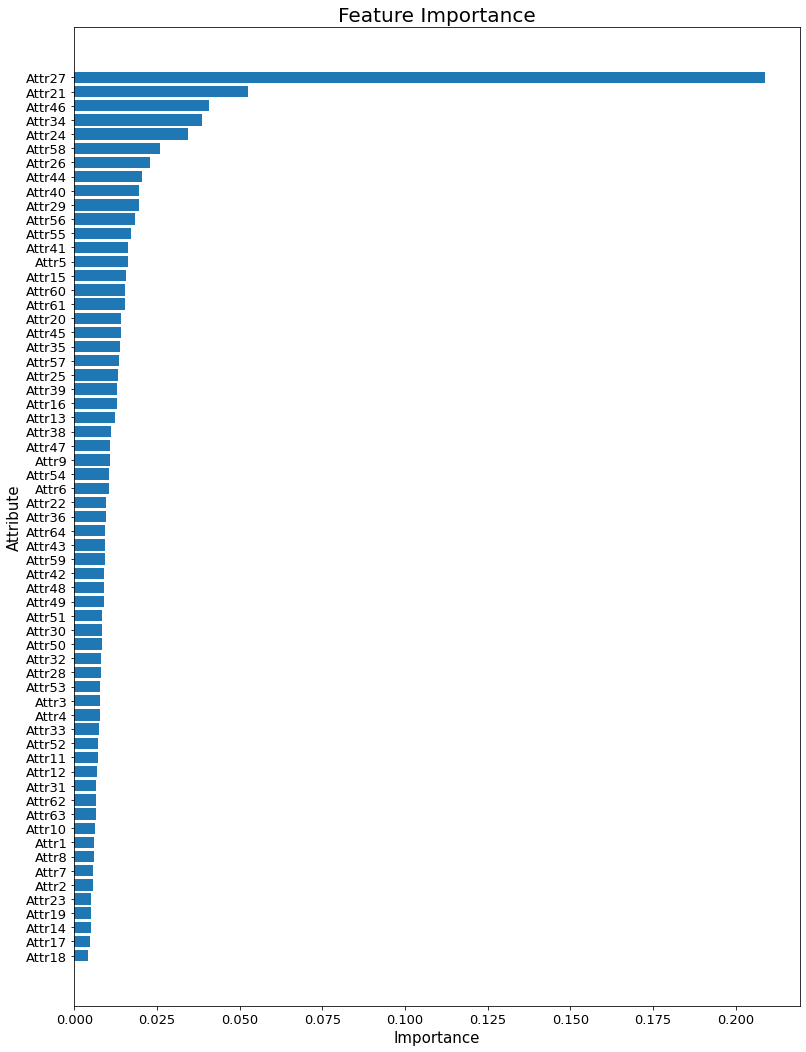

In [35]:
forest = RandomForestClassifier(n_estimators = 100, max_features = 40, max_depth = 40, random_state = 42)
forest.fit(trainX,trainY)

labels_ = data_base.columns[:-1]
import_     = forest.feature_importances_

important_features_dict = {}
for idx, val in zip(labels_,import_):
    important_features_dict[idx] = val

important_features_dict
lists = sorted(important_features_dict.items(), key=lambda item: item[1],reverse=False)
x,y = zip(*lists)


print(f'15 most important features: {lists[::-1][0:15]}')

# Graphically
plt.figure(figsize=(13,18))
plt.barh(x,y)
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Attribute', fontsize=15)
plt.xlabel('Importance', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()



In [36]:
# based on above featrure importance we selected 
features_forest_base = ['Attr27','Attr21','Attr34','Attr46','Attr24','Attr58','Attr15','Attr26','Attr56','Attr40',
                        'Attr20','Attr61','Attr5','Attr44','Attr55','class']

In [37]:
x = data_base_fp[features_forest_base].drop('class', axis=1)
y = data_base_fp[features_forest_base]['class']
trainX, testX, trainY, testY = train_test_split(x, y,stratify=y, test_size = 0.25)

In [38]:
forest = RandomForestClassifier(n_estimators = 100, max_features = 15, max_depth = 40, random_state = 42)
forest.fit(trainX,trainY)
recall = recall_score(testY, forest.predict(testX))
recall

0.3902439024390244

In [41]:
pd.DataFrame(([0.50,14],[0.39,15]),
             index=['Logistic','Random Forest'],
            columns=['Recall Scores','number of Features'])

,Recall Scores,number of Features
Logistic,0.50,14
Random Forest,0.39,15


**Comments:** <br>
- Even after feature selection, the base line model of Logistic Regression and Random Forests yield a Recall Metric of 0.50 and 0.39 respectively on the test data.
- These results don't agree with the expectations of predicting Bankruptcy, therefore an analysis without outliers data is performed.

## 3. Exploratory Model: Exploratory Analysis and Feature Section without Outliers

After checking that the Baseline Model using a dataset with outliers, do not manage to perform as expected, an exploratory model is built in order to check if the dataset with the treated outliers can provide a better perfomance.

In [42]:
# Creating a dict, which we will use to retrive the actual names of attributes.

names = {  "Attr1" : "net profit / total assets" ,
 "Attr2" : "total liabilities / total assets" ,
 "Attr3" : "working capital / total assets" ,
 "Attr4" : "current assets / short-term liabilities" ,
 "Attr5" : "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365" ,
 "Attr6" : "retained earnings / total assets" ,
 "Attr7" : "EBIT / total assets" ,
 "Attr8" : "book value of equity / total liabilities" ,
 "Attr9" : "sales / total assets" ,
 "Attr10" : "equity / total assets" ,
 "Attr11" : "(gross profit + extraordinary items + financial expenses) / total assets" ,
 "Attr12" : "gross profit / short-term liabilities" ,
 "Attr13" : "(gross profit + depreciation) / sales" ,
 "Attr14" : "(gross profit + interest) / total assets" ,
 "Attr15" : "(total liabilities * 365) / (gross profit + depreciation)" ,
 "Attr16" : "(gross profit + depreciation) / total liabilities" ,
 "Attr17" : "total assets / total liabilities" ,
 "Attr18" : "gross profit / total assets" ,
 "Attr19" : "gross profit / sales" ,
 "Attr20" : "(inventory * 365) / sales" ,
 "Attr21" : "sales (n) / sales (n-1)" ,
 "Attr22" : "profit on operating activities / total assets" ,
 "Attr23" : "net profit / sales" ,
 "Attr24" : "gross profit (in 3 years) / total assets" ,
 "Attr25" : "(equity - share capital) / total assets" ,
 "Attr26" : "(net profit + depreciation) / total liabilities" ,
 "Attr27" : "profit on operating activities / financial expenses" ,
 "Attr28" : "working capital / fixed assets" ,
 "Attr29" : "logarithm of total assets" ,
 "Attr30" : "(total liabilities - cash) / sales" ,
 "Attr31" : "(gross profit + interest) / sales" ,
 "Attr32" : "(current liabilities * 365) / cost of products sold" ,
 "Attr33" : "operating expenses / short-term liabilities" ,
 "Attr34" : "operating expenses / total liabilities" ,
 "Attr35" : "profit on sales / total assets" ,
 "Attr36" : "total sales / total assets" ,
 "Attr37" : "(current assets - inventories) / long-term liabilities" ,
 "Attr38" : "constant capital / total assets" ,
 "Attr39" : "profit on sales / sales" ,
 "Attr40" : "(current assets - inventory - receivables) / short-term liabilities" ,
 "Attr41" : "total liabilities / ((profit on operating activities + depreciation) * (12/365))" ,
 "Attr42" : "profit on operating activities / sales" ,
 "Attr43" : "rotation receivables + inventory turnover in days" ,
 "Attr44" : "(receivables * 365) / sales" ,
 "Attr45" : "net profit / inventory" ,
 "Attr46" : "(current assets - inventory) / short-term liabilities" ,
 "Attr47" : "(inventory * 365) / cost of products sold" ,
 "Attr48" : "EBITDA (profit on operating activities - depreciation) / total assets" ,
 "Attr49" : "EBITDA (profit on operating activities - depreciation) / sales" ,
 "Attr50" : "current assets / total liabilities" ,
 "Attr51" : "short-term liabilities / total assets" ,
 "Attr52" : "(short-term liabilities * 365) / cost of products sold)" ,
 "Attr53" : "equity / fixed assets" ,
 "Attr54" : "constant capital / fixed assets" ,
 "Attr55" : "working capital" ,
 "Attr56" : "(sales - cost of products sold) / sales" ,
 "Attr57" : "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)" ,
 "Attr58" : "total costs /total sales" ,
 "Attr59" : "long-term liabilities / equity" ,
 "Attr60" : "sales / inventory" ,
 "Attr61" : "sales / receivables" ,
 "Attr62" : "(short-term liabilities *365) / sales" ,
 "Attr63" : "sales / short-term liabilities" ,
 "Attr64" : "sales / fixed assets" ,
 "class" : "class" }

#### Check for Collinearities

In [43]:
# Bankruptcy Data is highly correlated with different attributes, we have considered only hight correlated features,for those 
# we used 0.95 and -0.85 correlation values for positive and negative correlations.

cor = Bdata.corr()
cor_list = []
for i in cor.columns:
    cor_list.append(cor[(cor[i] > 0.95)|(cor[i]< -0.85)][i])
    
cor_list

[Attr1     1.000000
 Attr7     0.990806
 Attr11    0.960868
 Attr14    0.990779
 Attr18    0.990423
 Name: Attr1, dtype: float64,
 Attr2     1.000000
 Attr10   -0.985475
 Name: Attr2, dtype: float64,
 Attr3    1.0
 Name: Attr3, dtype: float64,
 Attr4    1.0
 Name: Attr4, dtype: float64,
 Attr5    1.0
 Name: Attr5, dtype: float64,
 Attr6    1.0
 Name: Attr6, dtype: float64,
 Attr1     0.990806
 Attr7     1.000000
 Attr11    0.970626
 Attr14    0.999972
 Attr18    0.999616
 Name: Attr7, dtype: float64,
 Attr8     1.000000
 Attr17    0.996659
 Name: Attr8, dtype: float64,
 Attr9    1.0
 Name: Attr9, dtype: float64,
 Attr2    -0.985475
 Attr10    1.000000
 Name: Attr10, dtype: float64,
 Attr1     0.960868
 Attr7     0.970626
 Attr11    1.000000
 Attr14    0.970591
 Attr18    0.970225
 Name: Attr11, dtype: float64,
 Attr12    1.0
 Name: Attr12, dtype: float64,
 Attr13    1.0
 Name: Attr13, dtype: float64,
 Attr1     0.990779
 Attr7     0.999972
 Attr11    0.970591
 Attr14    1.000000
 Attr1

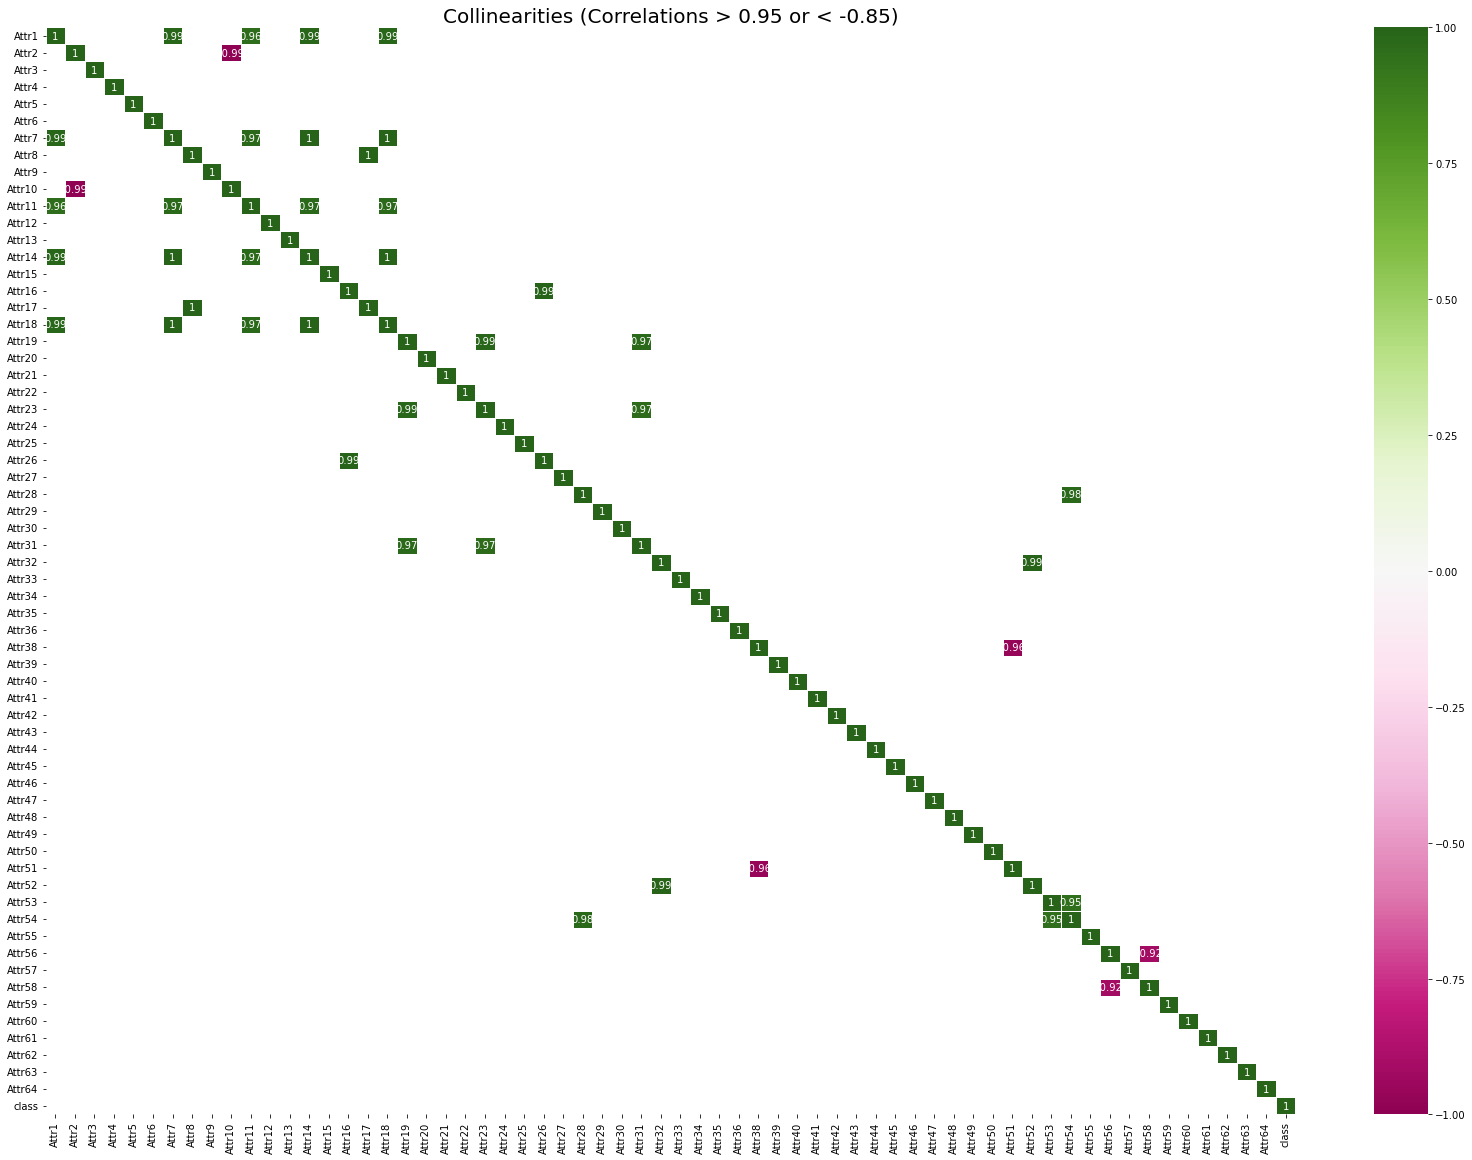

In [44]:
fig,ax  = plt.subplots(1,1,figsize = (28,20))
sns.heatmap(data= cor[(cor>0.95) | (cor<-.85)],vmin=-1,vmax=1,cmap="PiYG",linewidths=0.8,ax=ax,annot=True)
ax.set_title('Collinearities (Correlations > 0.95 or < -0.85)', fontsize=20)
plt.show();


**Comments:** <br>
- Heatmap shows that data contains features which are highly correlated.
- Pairplots are used to have a better understanding of these correlations.

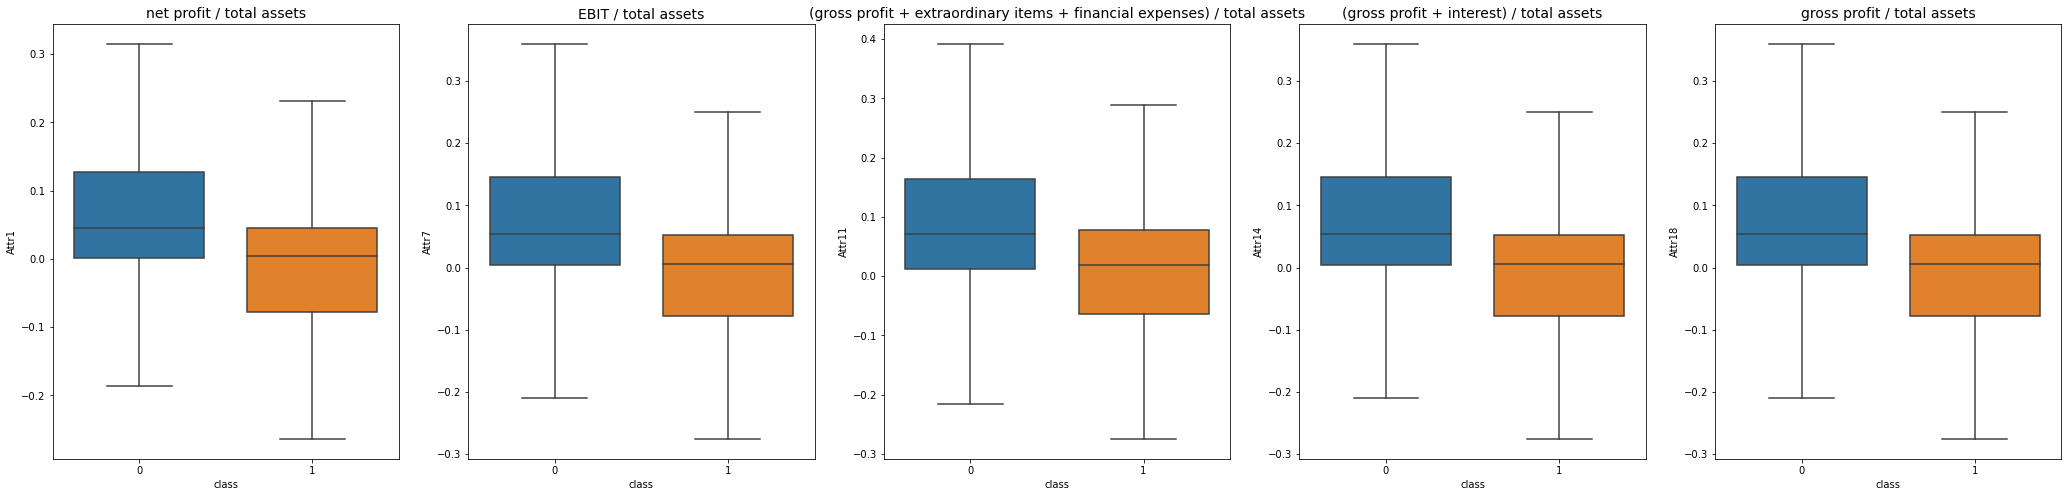

In [45]:
fig, axes = plt.subplots(1,5,figsize = (36,8))
set1 = ['Attr1','Attr7','Attr11','Attr14','Attr18',"class"]

for i in range(len(set1)-1):
    sns.boxplot(data=Bdata,y=set1[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set1[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set1[i]],fontsize=14)


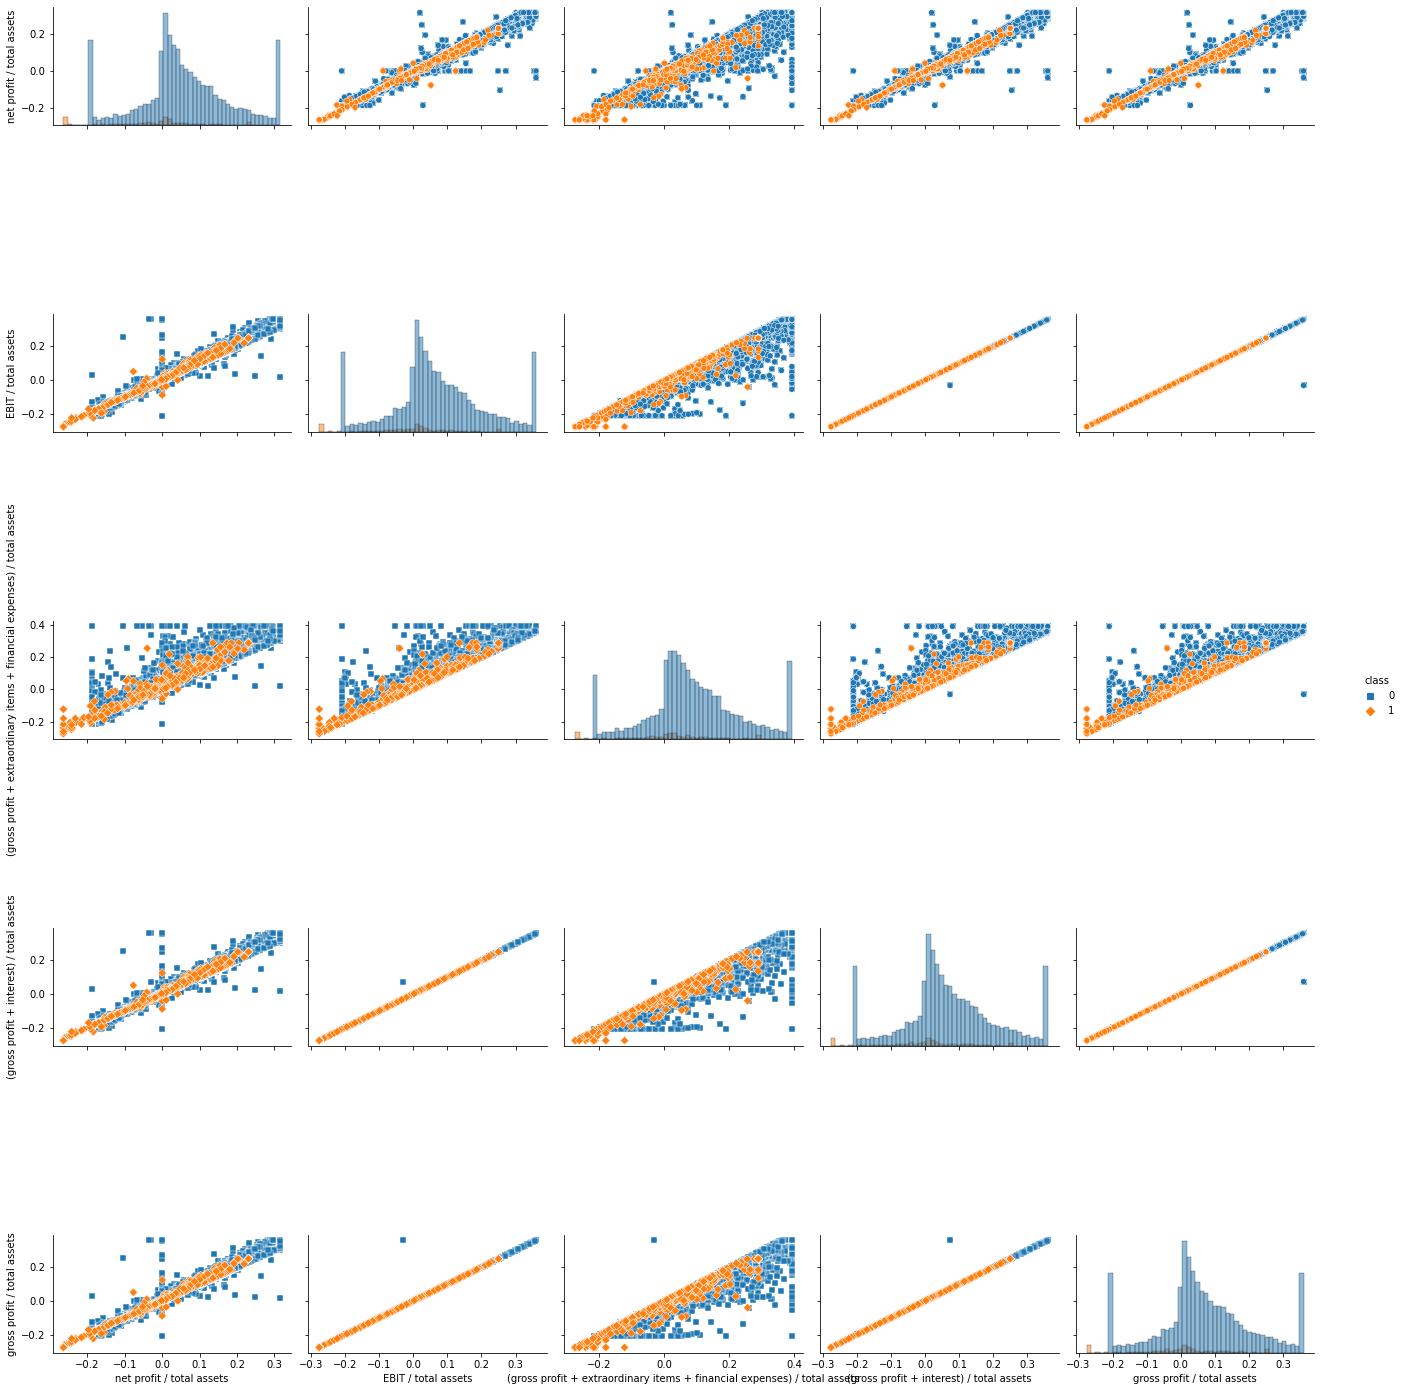

In [46]:
plt.rcParams['figure.figsize'] = (10,8)

col = dict(([i,names[i]] for i in set1))
ag = sns.pairplot(data=Bdata[set1].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(20,20)


**Comments:** <br>
- Variables {'Attr1','Attr7','Attr11','Attr14','Attr18'} are highly correlated.
- Attr11 will be considered, as is more correlated with Attr1,Attr7 Attr14 and Attr18.*

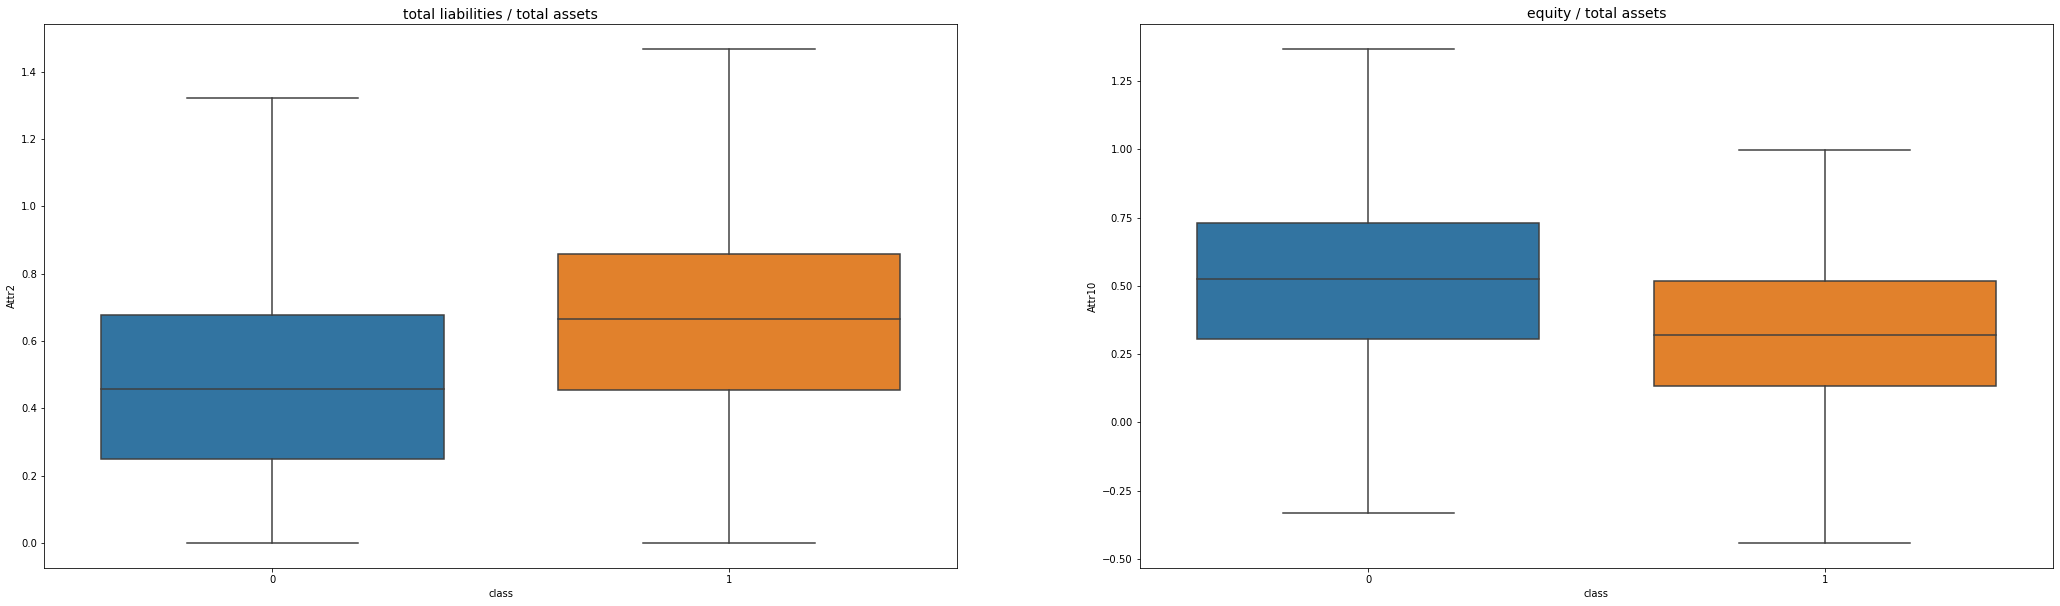

In [47]:
fig, axes = plt.subplots(1,2,figsize = (36,10))
set2 = ['Attr2','Attr10',"class"]

for i in range(len(set2)-1):
    sns.boxplot(data=Bdata,y=set2[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set2[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set2[i]],fontsize=14)

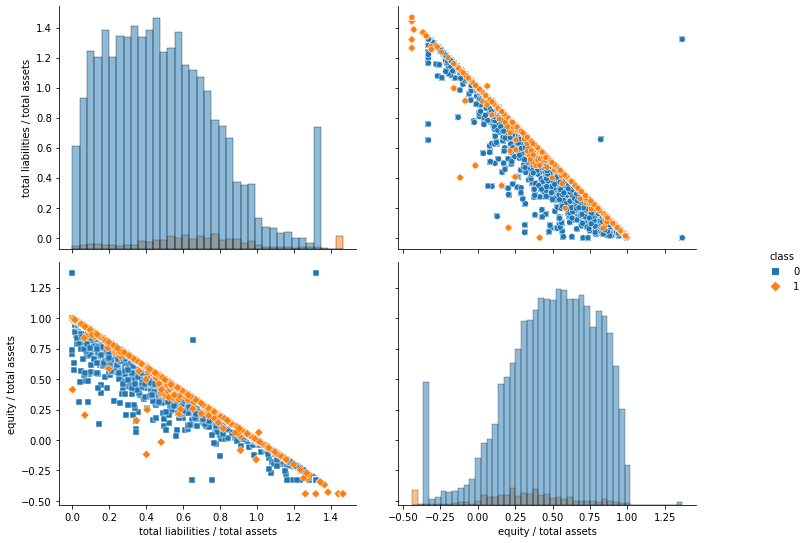

In [48]:
col = dict(([i,names[i]] for i in set2))
ag = sns.pairplot(data=Bdata[set2].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(12,8)


**Comments:** <br>
- 'Attr2' and 'Attr10' are correlated
- 'Attr10' will be considered.

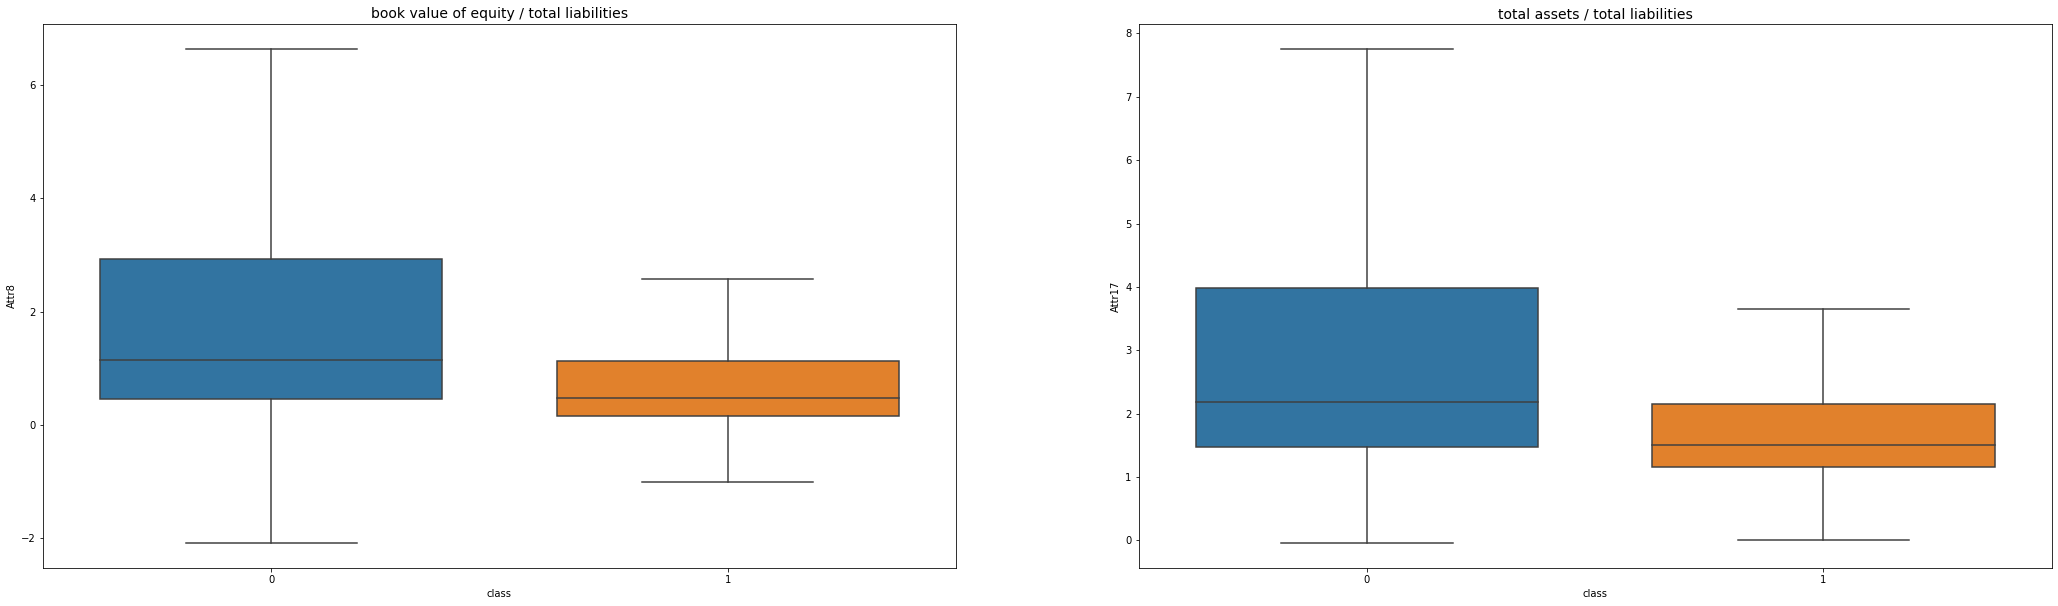

In [49]:
fig, axes = plt.subplots(1,2,figsize = (36,10))
set3 = ['Attr8','Attr17',"class"]

for i in range(len(set3)-1):
    sns.boxplot(data=Bdata,y=set3[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set3[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set3[i]],fontsize=14)

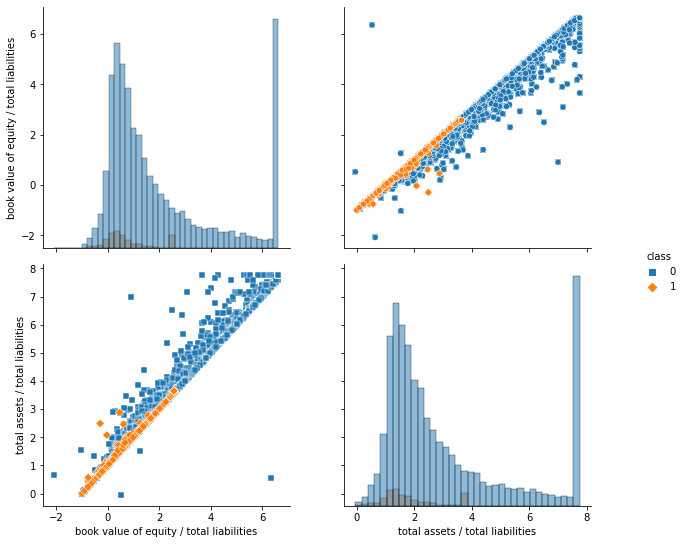

In [50]:
col = dict(([i,names[i]] for i in set3))
ag = sns.pairplot(data=Bdata[set3].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(10,8)

**Comments:** <br>
- 'Attr8' and 'Attr17' are correlated
- 'Attr17' will be considered.

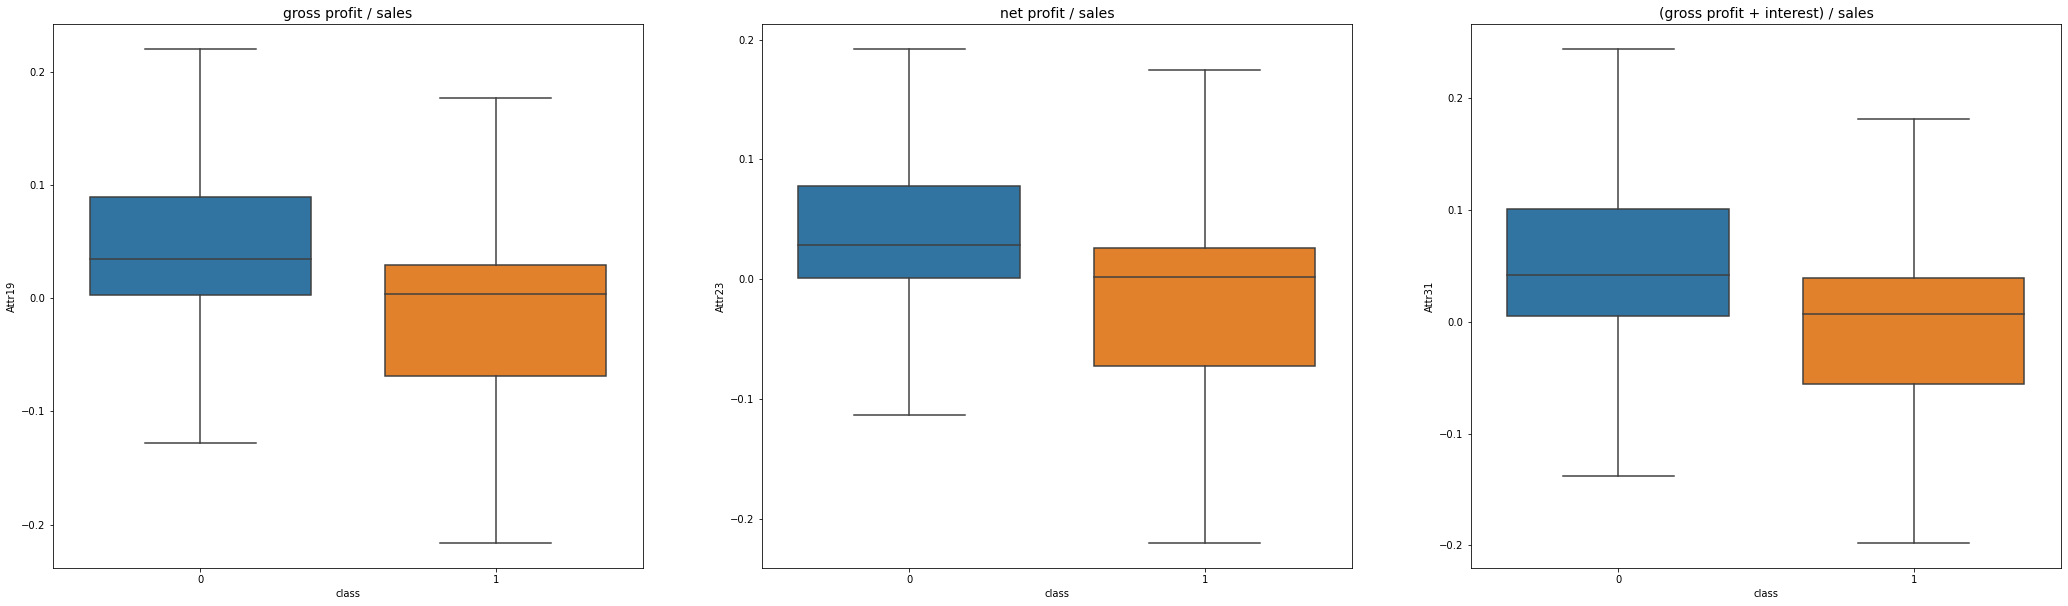

In [51]:
fig, axes = plt.subplots(1,3,figsize = (36,10))
set4 = ['Attr19','Attr23','Attr31',"class"]

for i in range(len(set4)-1):
    sns.boxplot(data=Bdata,y=set4[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set4[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set4[i]],fontsize=14)

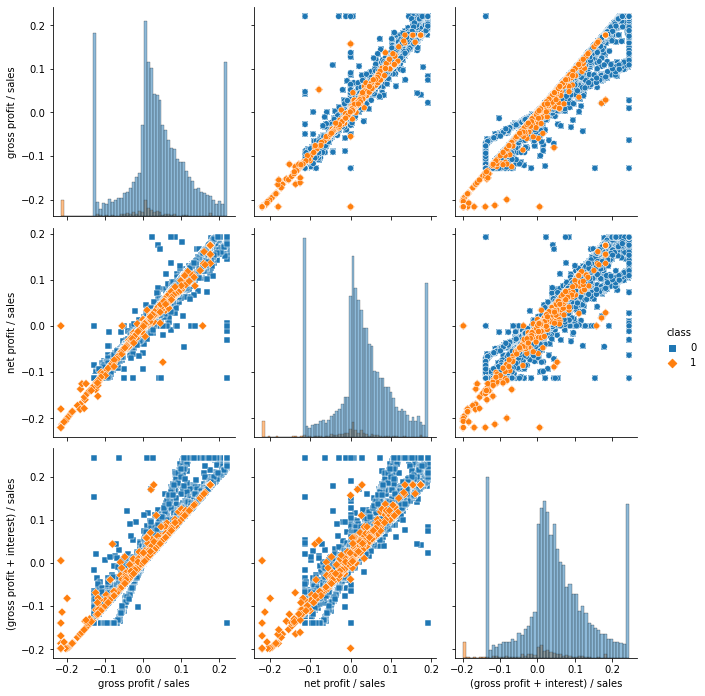

In [52]:
col = dict(([i,names[i]] for i in set4))
ag = sns.pairplot(data=Bdata[set4].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(10,10)


**Comments:** <br>
- 'Attr19', 'Attr23' and 'Attr31' are correlated
- 'Attr23' will be considered.

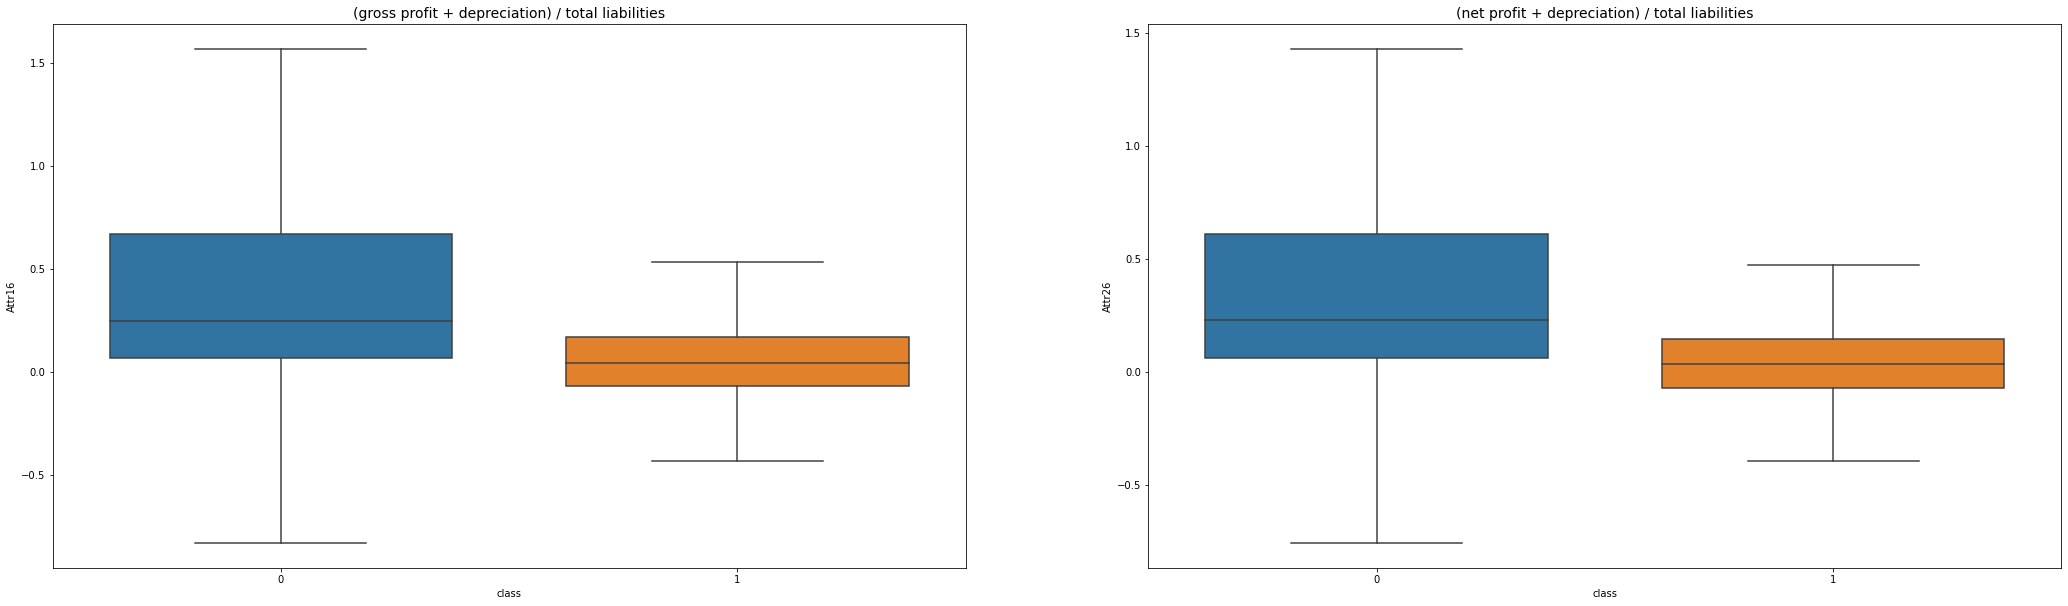

In [53]:
fig, axes = plt.subplots(1,2,figsize = (36,10))
set5 = ['Attr16','Attr26',"class"]

for i in range(len(set5)-1):
    sns.boxplot(data=Bdata,y=set5[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set5[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set5[i]],fontsize=14)

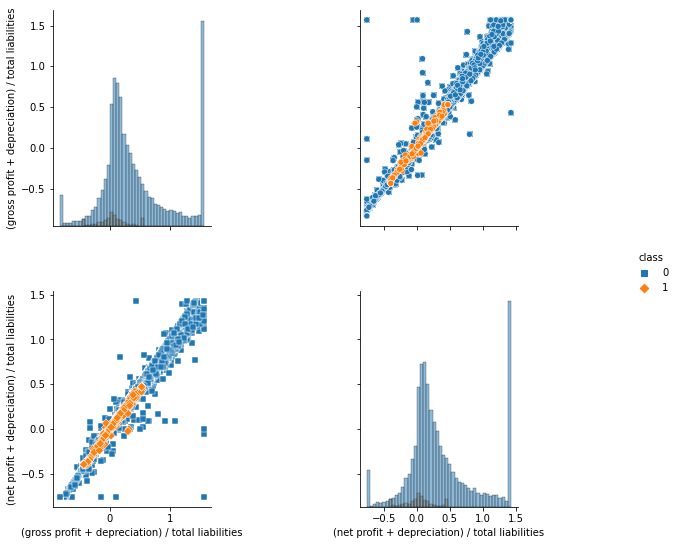

In [54]:
col = dict(([i,names[i]] for i in set5))
ag = sns.pairplot(data=Bdata[set5].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(10,8)


**Comments:** <br>
- 'Attr16' and 'Attr26' are correlated
- 'Attr16' will be considered.

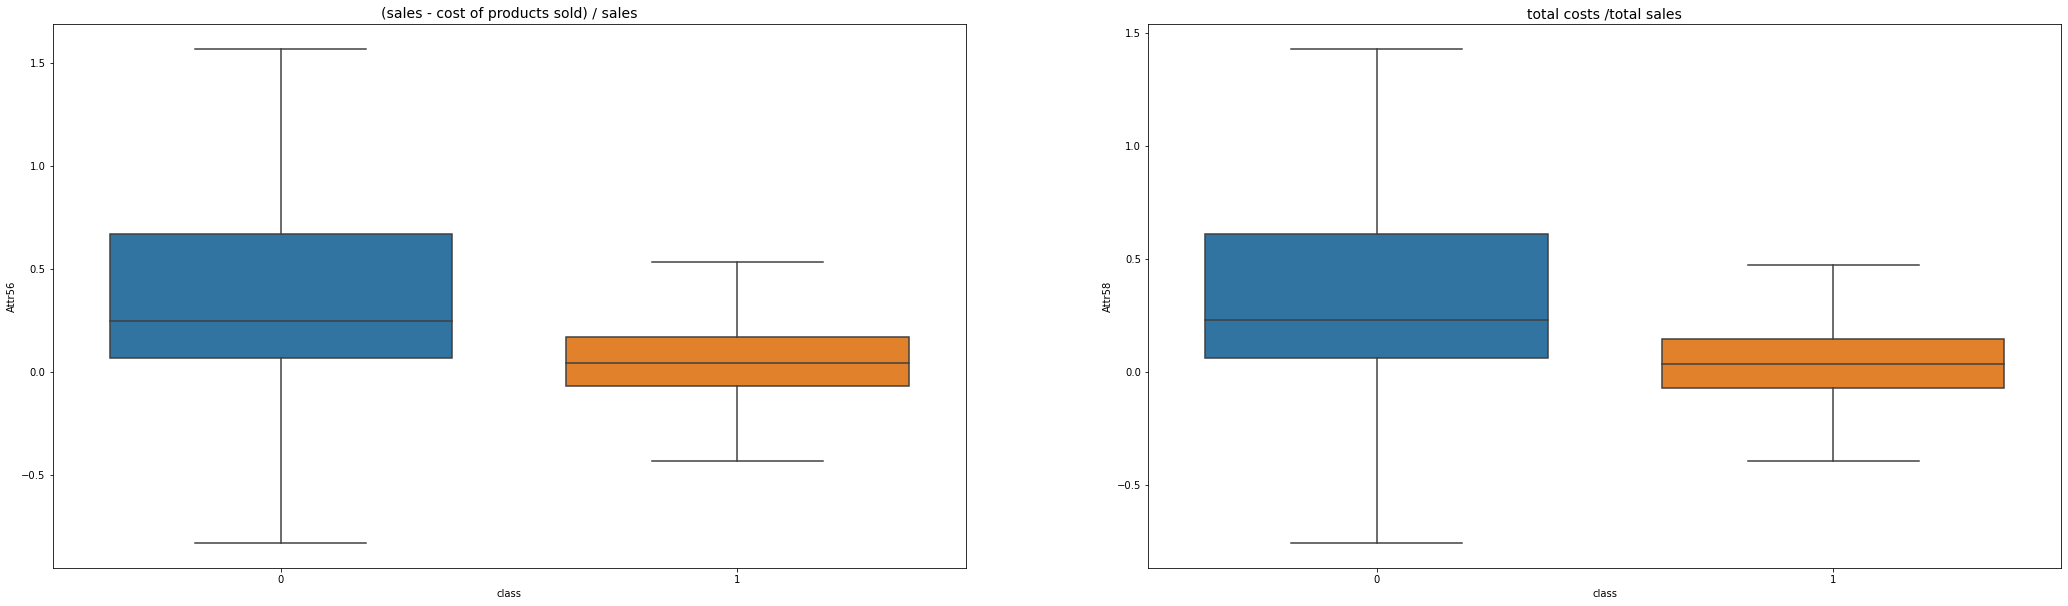

In [55]:
fig, axes = plt.subplots(1,2,figsize = (36,10))
set6 = ['Attr56','Attr58',"class"]

for i in range(len(set6)-1):
    sns.boxplot(data=Bdata,y=set5[i],x= "class",width=0.75,ax=axes[i])
    axes[i].set_ylabel(set6[i])
    axes[i].set_xlabel("class")
    axes[i].set_title(names[set6[i]],fontsize=14)

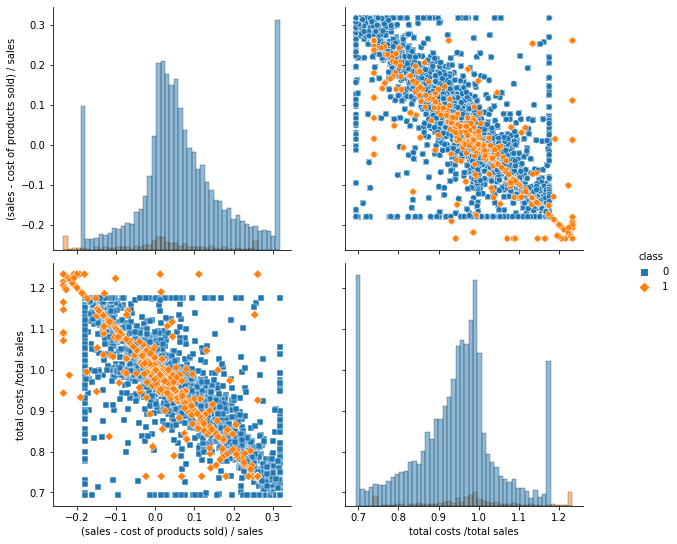

In [56]:
col = dict(([i,names[i]] for i in set6))
ag = sns.pairplot(data=Bdata[set6].rename(columns=col),hue="class",markers=['s','D'],diag_kind='hist')
ag.map_upper(sns.scatterplot)
ag.fig.set_size_inches(10,8)


**Comments:** <br>
- 'Attr56' and 'Attr58' are correlated
- 'Attr58' will be considered.

#### Based on correlations of Attributes, 52 features can be pre-selected on to which built models. These features are the following:

In [57]:
features_prob = ['Attr3', 'Attr4', 'Attr5', 'Attr6','Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr15', 'Attr17', 
                 'Attr19', 'Attr20', 'Attr21', 'Attr22','Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
                 'Attr30', 'Attr31','Attr33', 'Attr34', 'Attr35', 'Attr36','Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42',
                 'Attr43', 'Attr44','Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50','Attr52', 'Attr53','Attr55',
                 'Attr57', 'Attr58','Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64', 'class'] 
len(features_prob)

53

### Feature Selection

As mentioned before, for feature selection in the exploratory model, two types of classifiers will be used:
1. Logistic Regression with Lasso.
2. Random Forests Classifier with Feature Importance

#### Logistic Regression with Lasso Regularization for Feature Selection - Model without Outliers

In [58]:
## Importing Libraries

from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [59]:
Bdata_fp = Bdata[features_prob]

In [60]:
x = Bdata_fp.drop('class', axis=1)
y = Bdata_fp['class']
trainX, testX, trainY, testY = train_test_split(x, y,stratify=y, test_size = 0.25)

In [61]:
scaler = StandardScaler()
scaler.fit(trainX)

logistic = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logistic.fit(trainX,trainY)

sel_ = SelectFromModel(logistic,threshold=0.2)
sel_.fit(scaler.transform(trainX.fillna(0)), trainY)

selected_feature = trainX.columns[(sel_.get_support())]
print('total features: {}'.format((trainX.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

selected_features = trainX.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feature

total features: 52
selected features: 16
features with coefficients shrank to zero: 18


Index(['Attr3', 'Attr6', 'Attr10', 'Attr17', 'Attr23', 'Attr33', 'Attr35',
       'Attr36', 'Attr38', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr58',
       'Attr61', 'Attr62'],
      dtype='object')

In [50]:
recall = recall_score(testY, logistic.predict(testX), average='macro')
recall


0.5159291921301669

In [62]:
features_log = ['Attr3', 'Attr6', 'Attr10', 'Attr17', 'Attr23', 'Attr33', 'Attr35',
       'Attr36', 'Attr38', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr58',
       'Attr61', 'Attr62','class']

#### Random Forests and Feature Importance for Feature Selection - Model without Outliers

15 most important features: [('Attr6', 0.1869811636366364), ('Attr15', 0.18286680166332944), ('Attr59', 0.13390458578876901), ('Attr41', 0.08636184840647652), ('Attr64', 0.06803712259929422), ('Attr23', 0.05817359567749415), ('Attr27', 0.042436660525227834), ('Attr61', 0.04035144953726042), ('Attr20', 0.026024677411228225), ('Attr9', 0.020766098935205535), ('Attr39', 0.016969931983337988), ('Attr35', 0.014063063159513566), ('Attr49', 0.011573114538658155), ('Attr45', 0.010146759408395038), ('Attr44', 0.009696796480251364)]


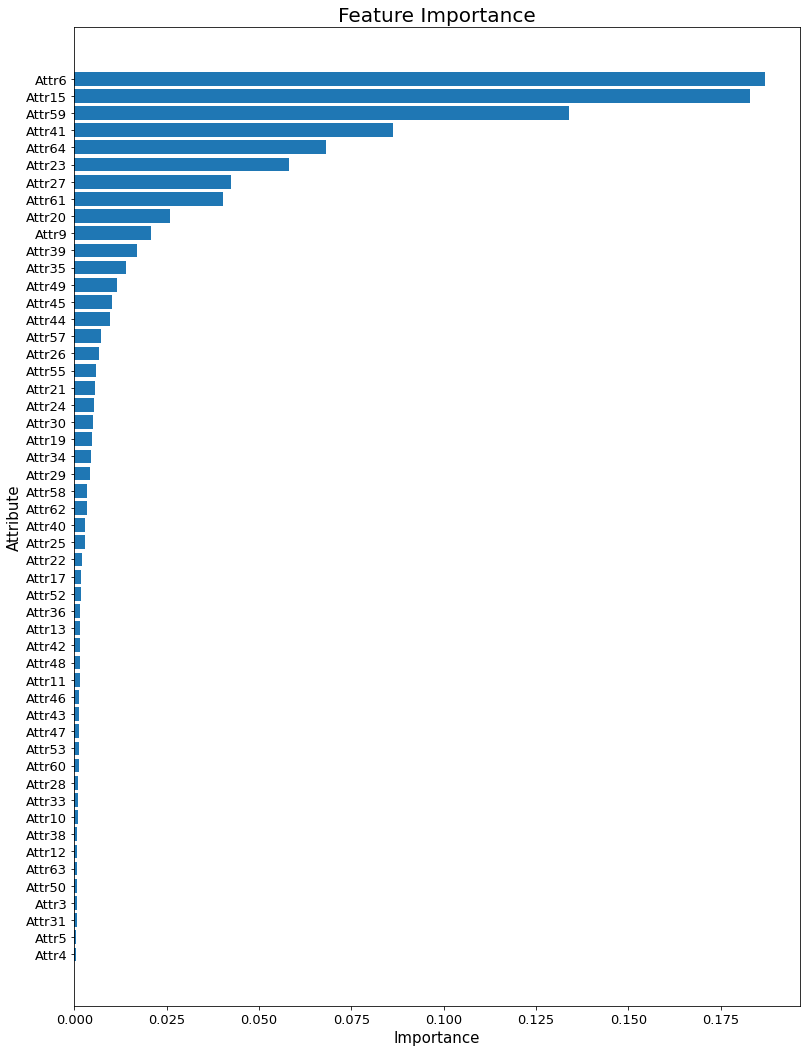

In [63]:
forest = RandomForestClassifier(n_estimators = 100, max_features = 40, max_depth = 40, random_state = 42)
forest.fit(trainX,trainY)

labels_ = features_prob[:-1]
import_     = forest.feature_importances_

important_features_dict = {}
for idx, val in zip(labels_,import_):
    important_features_dict[idx] = val

important_features_dict
lists = sorted(important_features_dict.items(), key=lambda item: item[1],reverse=False)
x,y = zip(*lists)


print(f'15 most important features: {lists[::-1][0:15]}')

# Graphically
plt.figure(figsize=(13,18))
plt.barh(x,y)
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Attribute', fontsize=15)
plt.xlabel('Importance', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()



**Comments:** <br>
- As stated before, the data shows imbalanced classes in which only 5% represents bankrupt against a 95% non-bankrupt.
- In order to overcome the observed imbalance, weights were used in the Random Forests Classifier as a proxy for prioritising good predictions for the bankruptcy class. 
- It is expected that this approach will allow to positively turn the sensitivity of the classifier towards the prediction of bankruptcy.

#### Random Forests and Feature Importance for Feature Selection - Model without Outliers using Weights in the Classifier

In [65]:
# Another try but with class_weight to check if we can improve the recall metric

df_model = Bdata[features_prob].copy(deep=True)
print(df_model.shape)

y = df_model["class"]
x = df_model.loc[:,df_model.columns != "class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

data_results = []

for weight in range(1,20):
    forest = RandomForestClassifier(n_estimators = 100, max_features = 40, max_depth = 40, class_weight={0:1,1:weight}, random_state = 42)
    forest.fit(X_train,y_train)
    model = SelectFromModel(forest, prefit=True)
    recall_ = recall_score(y_test, forest.predict(X_test))
    names = model.get_support()
    data_results.append([weight, model.transform(X_train).shape[1], recall_.round(decimals=2), X_train.columns[names].values])

    
results = pd.DataFrame(data_results, columns=['weight','predictors','recall','predictor_names'])
results

(10416, 53)


,weight,predictors,recall,predictor_names
0,1,9,0.95,"[Attr6, Attr15, Attr23, Attr27, Attr39, Attr41..."
1,2,9,0.95,"[Attr6, Attr15, Attr23, Attr27, Attr39, Attr41..."
2,3,9,0.95,"[Attr6, Attr15, Attr23, Attr27, Attr39, Attr41..."
3,4,9,0.95,"[Attr6, Attr15, Attr23, Attr27, Attr39, Attr41..."
4,5,9,0.95,"[Attr6, Attr15, Attr23, Attr27, Attr39, Attr41..."
5,6,10,0.95,"[Attr6, Attr15, Attr23, Attr26, Attr27, Attr39..."
6,7,10,0.95,"[Attr6, Attr15, Attr23, Attr26, Attr27, Attr39..."
7,8,11,0.95,"[Attr6, Attr15, Attr20, Attr23, Attr26, Attr27..."
8,9,11,0.95,"[Attr6, Attr15, Attr20, Attr23, Attr26, Attr27..."
9,10,10,0.95,"[Attr6, Attr15, Attr23, Attr26, Attr27, Attr39..."


In [66]:
data_results[18]

[19,
 10,
 0.96,
 array(['Attr6', 'Attr15', 'Attr23', 'Attr26', 'Attr27', 'Attr41',
        'Attr55', 'Attr59', 'Attr61', 'Attr64'], dtype=object)]

**Comments:** <br>
- 10 Features give a recall of 0.96 with Random Forest Classifier using a weight of 19.
- These features are the following: **'Attr6', 'Attr15', 'Attr23', 'Attr26', 'Attr27', 'Attr41', 'Attr55', 'Attr59', 'Attr61' and 'Attr64'**.

In [67]:
features_10 = ['Attr6', 'Attr15', 'Attr23', 'Attr26', 'Attr27', 'Attr41',
        'Attr55', 'Attr59', 'Attr61', 'Attr64','class']

## Final Comments on Exploratory Model and Feature Selection


- From Random Forest Classifier, 10 features were obtained after assessing Feature Importance.
- These features are: **'Attr6', 'Attr15', 'Attr20', 'Attr23', 'Attr27','Attr39','Attr41','Attr59','Attr61' and 'Attr64'**
- Together, these features built a random-forest-based classifier that manage to perform with a preliminary Recall Metric of 96%
- The next sections of the analysis, aim to perform Model Selection and Model Assessment using what up to now was learned:
    - The database with treated outliers, managed to provide better information regarding bankruptcy estimation.
    - Only 10 features are sufficient to fully predict the response variable.

## 4. Model Selection
#### In this section, different classifiers are evaluated in terms of performance to do Model Selection. This includes: Hyperparameter Tuning.

The different type of classifiers considered are:
 - LogisticRegression
 - KNN
 - Support Vector Classifier
 - Random Forest Classifier

In this section:
- We tried using Hyperparameter tuning to select the best parameters for classifiers.
- Effect of class_weights on Recall and F1, two metrics which are considered for model performance.
- Select the best Model overall.

In [76]:
df_model = Bdata[features_10].copy(deep=True)
print(df_model.shape)

y = df_model["class"]
x = df_model.loc[:,df_model.columns != "class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

(10416, 11)


In [77]:
# Model Performance without Hyperparameter Tuning

from sklearn.model_selection import StratifiedKFold

# we used StratifiedKFold (folds = 5) for cross validation
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

Logistic_Regression = make_pipeline(StandardScaler(),LogisticRegression(max_iter=10000))

classifiers = {
    "LogisticRegression": Logistic_Regression,
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=skf,scoring='recall')  
    
    print("Classifiers: ", key, "Has a training score of {:.2f}".format(training_score.mean()*100), 
          "% recall score")

Classifiers:  LogisticRegression Has a training score of 2.70 % recall score
Classifiers:  KNearest Has a training score of 36.22 % recall score
Classifiers:  Support Vector Classifier Has a training score of 28.11 % recall score
Classifiers:  RandomForestClassifier Has a training score of 90.81 % recall score


**Comments:** <br>
- Random Forests Classifier show a better perfomance, with a Recall Score of 90.8%.
- The other models exhibit low performance.

### 4.1 LogisticRegression Hyperparameter tuning

In [78]:


LR = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2'))

LRparam_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1,10],
    'logisticregression__max_iter': list(range(4000,10000,2000)),
    'logisticregression__solver': ['liblinear', 'sag', 'saga'],
    'logisticregression__class_weight':[{0:1,1:5},{0:1,1:10},{0:1,1:15},{0:1,1:20},{0:1,1:25}]     
}

LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True,scoring='recall', verbose = 3, cv=2)

# fitting the model for grid search 
LR_search.fit(trainX , trainY)
LR_search.best_params_


# summarize
print('Mean Recall: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 2 folds for each of 225 candidates, totalling 450 fits
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.038 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.000 total time=   0.2s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.005 total time=   0.1s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.000 tot

[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.114 total time=   0.1s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.249 total time=   0.0s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.114 total time=   0.3s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.249 total time=   0.2s
[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=8000, logisticregression__solver=liblinear;, score=0.205 total time=   0.0s
[CV 2/2] END logisticregression__C=0.001, logis

[CV 1/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=saga;, score=0.881 total time=   0.2s
[CV 2/2] END logisticregression__C=0.001, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=saga;, score=0.789 total time=   0.1s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.016 total time=   0.0s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.027 total time=   0.0s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.016 total time=   0.8s
[CV 2/2] END logisticregression__C=0.01, logist

[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.270 total time=   0.8s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.324 total time=   0.5s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.270 total time=   1.5s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.324 total time=   1.0s
[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=8000, logisticregression__solver=liblinear;, score=0.281 total time=   0.0s
[CV 2/2] END logisticregression__C=0.01, logisticreg

[CV 1/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=saga;, score=0.832 total time=   1.4s
[CV 2/2] END logisticregression__C=0.01, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=saga;, score=0.751 total time=   1.0s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.022 total time=   0.0s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.027 total time=   0.0s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.022 total time=   3.4s
[CV 2/2] END logisticregression__C=0.1, logisticregr

[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.427 total time=   0.0s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.335 total time=   3.5s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.427 total time=   2.4s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.324 total time=   5.8s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.422 total time=   3.8s
[CV 1/2] END logisticregression__C=0.1, logisticregressio

[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=sag;, score=0.730 total time=   2.4s
[CV 1/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=saga;, score=0.784 total time=   5.8s
[CV 2/2] END logisticregression__C=0.1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=saga;, score=0.735 total time=   3.7s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.027 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=liblinear;, score=0.054 total time=   0.1s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.032 total time=   8.5s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.054 total time=   7.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.032 total time=   9.9s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.049 total time=   9.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.027 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.054 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.032 total time=   9.8s
[CV 2/2] END logisticregression__C=1, logisticregression__class_we

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.184 total time=   8.5s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.265 total time=   7.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.173 total time=   9.5s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.259 total time=   8.8s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.205 total time=   0.2s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.281 total time=   0.1s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.189 total time=   9.4s
[CV 2/2] END logisticregression__C=1, logisticregression__cla

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.405 total time=   8.5s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.465 total time=   7.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.373 total time=   9.6s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.470 total time=   8.9s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.432 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.465 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.405 total time=   9.0s
[CV 2/2] END logisticregression__C=1, logisticregression__cla

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.659 total time=   8.3s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.616 total time=   7.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.643 total time=   9.8s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.611 total time=   9.8s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.654 total time=   0.1s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.643 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.654 total time=   9.6s
[CV 2/2] END logisticregression__C=1, logisticregression__cla

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.784 total time=   8.3s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.730 total time=   7.8s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.773 total time=   9.5s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.741 total time=   9.0s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.784 total time=   0.3s
[CV 2/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.741 total time=   0.2s
[CV 1/2] END logisticregression__C=1, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.784 total time=   8.8s
[CV 2/2] END logisticregression__C=1, logisticregression__cla

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.032 total time=   8.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.054 total time=   8.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.032 total time=   9.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.054 total time=   9.3s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.043 total time=   0.7s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.086 total time=   0.4s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.032 total time=  12.5s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 5}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.065 total time=   9.7s
[CV 1/2] END logisticregression__C=10, logisticregression__cla

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.195 total time=   8.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.297 total time=   8.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.178 total time=   9.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.270 total time=   9.6s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.265 total time=   0.6s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.314 total time=   0.6s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.205 total time=  11.5s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 10}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.297 total time=  12.0s
[CV 1/2] END logisticregression__C=10, logisticregression

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.405 total time=   8.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.465 total time=   8.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.389 total time=   9.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.465 total time=   9.5s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.476 total time=   0.6s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.530 total time=   0.5s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.432 total time=  11.5s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.476 total time=  12.6s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.395 total time=  13.3s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.465 total time=  11.1s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=8000, logisticregression__solver=liblinear;, score=0.476 total time=   0.6s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 15}, logisticregression__max_iter=8000, logisticregression__solver=liblinear;, score=0.530 total time=   0.5s
[CV 1/2] END logisticregression__C=10, logisticregressio

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.649 total time=   8.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.638 total time=   8.4s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.649 total time=   9.3s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.627 total time=   9.3s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.665 total time=   0.8s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.670 total time=   0.6s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.643 total time=  11.0s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.638 total time=  12.3s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.659 total time=  13.1s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.622 total time=  11.6s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=8000, logisticregression__solver=liblinear;, score=0.665 total time=   0.8s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 20}, logisticregression__max_iter=8000, logisticregression__solver=liblinear;, score=0.670 total time=   0.6s
[CV 1/2] END logisticregression__C=10, logisticregressio

C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.789 total time=   8.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=4000, logisticregression__solver=sag;, score=0.730 total time=   8.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.778 total time=   9.2s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=4000, logisticregression__solver=saga;, score=0.730 total time=   9.2s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.757 total time=   0.8s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=liblinear;, score=0.757 total time=   0.7s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.773 total time=  10.7s


C:\Users\Shanks\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=sag;, score=0.730 total time=  12.2s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.784 total time=  13.2s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=6000, logisticregression__solver=saga;, score=0.724 total time=  12.0s
[CV 1/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=liblinear;, score=0.757 total time=   0.8s
[CV 2/2] END logisticregression__C=10, logisticregression__class_weight={0: 1, 1: 25}, logisticregression__max_iter=8000, logisticregression__solver=liblinear;, score=0.757 total time=   0.6s
[CV 1/2] END logisticregression__C=10, logisticregressio

In [82]:
logistic = make_pipeline(StandardScaler(),LogisticRegression(C=0.001,max_iter=4000,class_weight={0:1,1:25},penalty = 'l2',solver='sag'))
logistic.fit(X_train, y_train)
recall = recall_score(y_test,logistic.predict(X_test))
f1 = f1_score(y_test,logistic.predict(X_test))
print('Test score LogisticRegression Recall:',recall.round(decimals=2),'and F1 score:', f1.round(decimals=2))

Test score LogisticRegression Recall: 0.86 and F1 score: 0.16


In [83]:
grid_logistic = logistic

After Hyperparameter tuning of LogisticRegression, the resulting parameters are: <br>
**{'C'= 0.001, class_weight'= {0: 1, 1: 25}, 'max_iter'= 4000, 'solver': 'sag','penalty'='l2'}}** <br>
<br>
The best scores obtained were:
- Recall Score of 83.5 % on training set,
- Recall Score of 86% on test set.



### 4.2 K-NN Hyperparameter tuning :

In [84]:
knears_params = {"n_neighbors": list(range(2,8,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params,scoring='recall',cv=skf)
grid_knears.fit(X_train, y_train)
# KNears best estimator
grid_KNN = grid_knears.best_estimator_

In [87]:
print('KNN best parameters',grid_knears.best_params_,'and best Recall score:',np.round(grid_knears.best_score_,2))

KNN best parameters {'algorithm': 'auto', 'n_neighbors': 3} and best Recall score: 0.38


In [88]:
recall = recall_score(y_test,grid_KNN.predict(X_test))
f1 = f1_score(y_test,grid_KNN.predict(X_test))
print('Test score KNN Recall:',recall.round(decimals=2),'and F1 score:', f1.round(decimals=2))

Test score KNN Recall: 0.36 and F1 score: 0.48


After Hyperparameter tuning of KNN, the resulting parameters are: <br>
**{'algorithm'= 'auto','n_neighbors = 3},}** <br>
<br>
The best scores obtained were:
- Recall Score of 38 % on training set,
- Recall Score of 36% on test set.

### 4.3 Support Vector Classifier (SVC) 

In [90]:
# Support Vector Classifier GridSearch

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
svc_params = {'C': [0.01, 0.5, 0.7, 0.9, 1], 'kernel': ['rbf'],'class_weight':[{0:1,1:10},{0:1,1:15},{0:1,1:20},{0:1,1:25}]}
grid_svc = GridSearchCV(SVC(probability=True), svc_params,scoring = 'recall',cv=skf)
grid_svc.fit(X_train, y_train)

# SVC best estimator
grid_SVC = grid_svc.best_estimator_

In [92]:
grid_svc.best_params_,grid_svc.best_score_

({'C': 0.01, 'class_weight': {0: 1, 1: 25}, 'kernel': 'rbf'},
 0.7081081081081081)

In [93]:
recall = recall_score(y_test,grid_SVC.predict(X_test))
f1 = f1_score(y_test,grid_SVC.predict(X_test))
print('Test score KNN Recall:',recall.round(decimals=2),'and F1 score:', f1.round(decimals=2))

Test score KNN Recall: 0.63 and F1 score: 0.17


After Hyperparameter tuning of SVC, the resulting parameters are: <br>
**{'C'= 0.01,'kernal' = 'rbf','class_weight' = {0: 1, 1: 25}}** <br>
<br>
The best scores obtained were:
- Recall Score of 70.8 % on training set,
- Recall Score of 63% on test set.



### 4.4 RandomForestClassifier

In [95]:
# RandomForestClassifier
forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(5,40,5)),'n_estimators':list(range(50,200,50)),
                 'class_weight':[{0:1,1:10},{0:1,1:15},{0:1,1:20},{0:1,1:25}]}
grid_forest = GridSearchCV(RandomForestClassifier(), forest_params,cv=skf)
grid_forest.fit(X_train, y_train)

# tree best estimator
forest_clf = grid_forest.best_estimator_

In [96]:
grid_forest.best_params_,grid_forest.best_score_

({'class_weight': {0: 1, 1: 20},
  'criterion': 'gini',
  'max_depth': 10,
  'n_estimators': 100},
 0.9965437129260764)

In [97]:
recall = recall_score(y_test,forest_clf.predict(X_test))
f1 = f1_score(y_test,forest_clf.predict(X_test))
{'C'= 0.01,'kernal' = 'rbf','class_weight' = {0: 1, 1: 25}}print('Test score KNN Recall:',recall.round(decimals=2),'and F1 score:', f1.round(decimals=2))

Test score KNN Recall: 0.97 and F1 score: 0.98


After Hyperparameter tuning of Random Forests Classifier, the resulting parameters are: <br>
**{'class_weight': {0: 1, 1: 20},'criterion': 'gini','max_depth': 10,'n_estimators': 100}}** <br>
<br>
The best scores obtained were:
- Recall Score of 99.6 % on training set,
- Recall Score of 97% on test set.

#####  Class_weight plays important role in getting higher recall
- The analyzed effect of class_weights on Recall and F1 score for LogisticRegression and SVC.
- For a good model performance (Specially in imbalance data) both Recall and F1 score should be good. Otherwise we have biased    model.

In [98]:
# Checking the recall and F1 score on the basis of class_weight, since our data is quite imbalance improving the class_weight 
# should have some impact on scoring

from sklearn.metrics import f1_score
results_LR = []
for weight in range(10,100,5):
    logistic = make_pipeline(StandardScaler(),LogisticRegression(C=1,max_iter=10000,class_weight={0:1,1:weight},penalty = 'l2'))
    logistic.fit(X_train, y_train)
    recall = recall_score(y_test,logistic.predict(X_test))
    f1 = f1_score(y_test,logistic.predict(X_test))
    results_LR.append([weight,recall,f1])
    
pd.DataFrame(results_LR,columns=["weights","Recall","F1"])


,weights,Recall,F1
0,10,0.447154,0.221774
1,15,0.601626,0.177885
2,20,0.764228,0.171065
3,25,0.869919,0.166149
4,30,0.910569,0.156973
5,35,0.934959,0.149254
6,40,0.951220,0.144892
7,45,0.959350,0.139480
8,50,0.967480,0.136703
9,55,0.967480,0.133858


#### As Recall is pushed, F1 reduces as shown below:

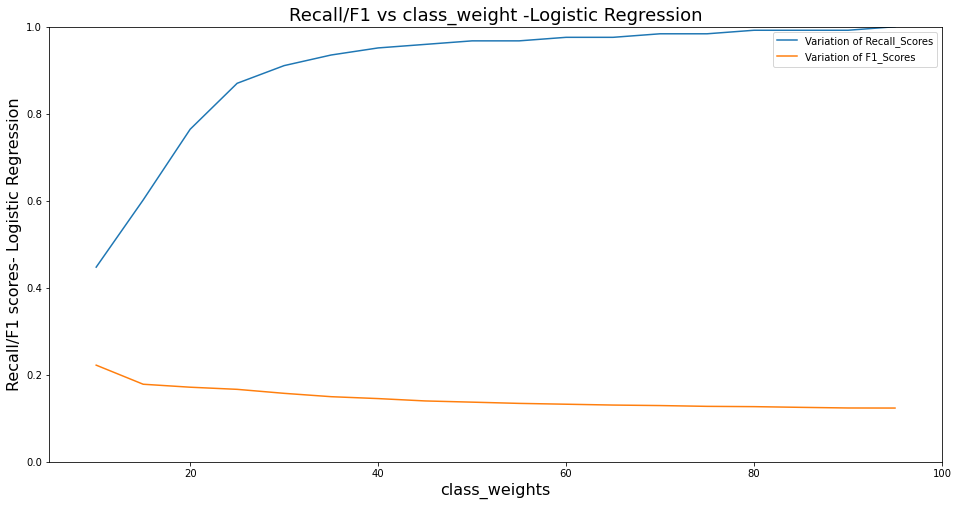

In [99]:
# Variation of Recall and F1 scores on the basis of class_weight

results_LR = pd.DataFrame(results_LR,columns=["weights","Recall","F1"])

plt.figure(figsize=(16,8))
plt.title('Recall/F1 vs class_weight -Logistic Regression', fontsize=18)
plt.plot(results_LR['weights'], results_LR['Recall'], label='Variation of Recall_Scores')
plt.plot(results_LR['weights'], results_LR['F1'], label='Variation of F1_Scores')  
plt.axis([5, 100, 0, 1])
plt.xlabel('class_weights', fontsize=16)
plt.ylabel('Recall/F1 scores- Logistic Regression', fontsize=16)
plt.legend()
plt.show()


Logistic Regression recall improves drastically by increasing the weight of the class, this will introduce bias in our model. This can been seen by F1 score which going down as recall is increasing.

In [100]:
# Checking the recall and F1 score on the basis of class_weight, since our data is quite imbalance improving the class_weight 
# should have some impact on scoring

from sklearn.metrics import f1_score
results_SVC = []
for weight in range(10,100,5):
    svc = SVC(C=0.5 , class_weight={0:1,1:weight}, kernel='rbf')
    svc.fit(X_train, y_train)
    recall = recall_score(y_test,svc.predict(X_test))
    f1 = f1_score(y_test,svc.predict(X_test))
    results_SVC.append([weight,recall,f1])
    
pd.DataFrame(results_SVC,columns=["weights","Recall","F1"])

,weights,Recall,F1
0,10,0.349593,0.434343
1,15,0.422764,0.372760
2,20,0.520325,0.286353
3,25,0.739837,0.180915
4,30,0.934959,0.126374
5,35,1.000000,0.116532
6,40,1.000000,0.116147
7,45,1.000000,0.116038
8,50,1.000000,0.115983
9,55,1.000000,0.115874


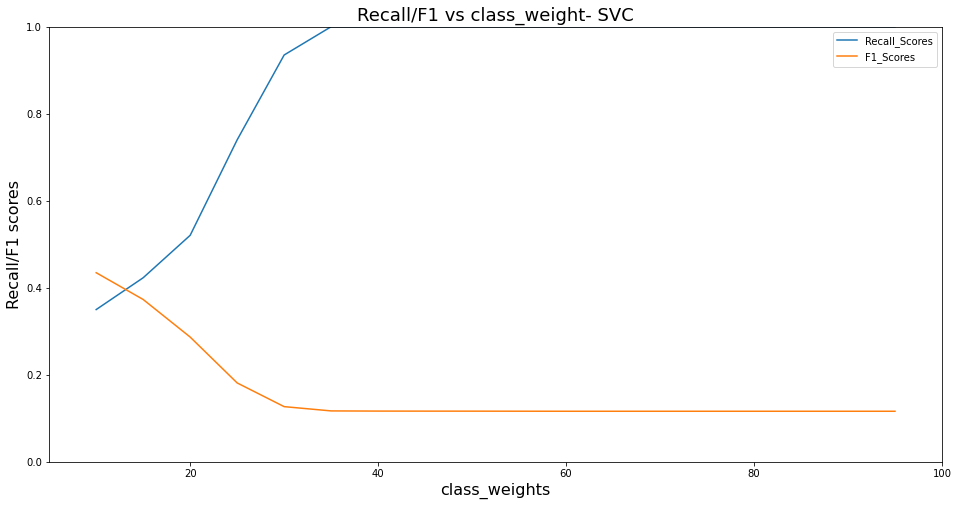

In [101]:
# Variation of Recall and F1 scores on the basis of class_weight

results_SVC = pd.DataFrame(results_SVC,columns=["weights","Recall","F1"])

plt.figure(figsize=(16,8))
plt.title('Recall/F1 vs class_weight- SVC', fontsize=18)
plt.plot(results_SVC['weights'], results_SVC['Recall'], label='Recall_Scores')
plt.plot(results_SVC['weights'], results_SVC['F1'], label='F1_Scores')  
plt.axis([5, 100, 0, 1])
plt.xlabel('class_weights', fontsize=16)
plt.ylabel('Recall/F1 scores', fontsize=16)
plt.legend()
plt.show()



Support Vector Classifiers recall improves drastically by increasing the weight of the class, this will introduce biased in our model. This can been seen by F1 score which going down as recall is increasing.

In [105]:
# Checking the recall and F1 score on the basis of class_weight, since our data is quite imbalance improving the class_weight 
# should have some impact on scoring

from sklearn.metrics import f1_score
results_forest = []
for weight in range(10,100,5):
    forest = RandomForestClassifier(n_estimators = 50, max_depth = 10, criterion='entropy', class_weight={0: 1, 1: 20}, random_state = 42)
    forest.fit(X_train, y_train)
    recall = recall_score(y_test,forest.predict(X_test))
    f1 = f1_score(y_test,forest.predict(X_test))
    results_forest.append([weight,recall,f1])
    
pd.DataFrame(results_forest,columns=["weights","Recall","F1"])

,weights,Recall,F1
0,10,0.96748,0.979424
1,15,0.96748,0.979424
2,20,0.96748,0.979424
3,25,0.96748,0.979424
4,30,0.96748,0.979424
5,35,0.96748,0.979424
6,40,0.96748,0.979424
7,45,0.96748,0.979424
8,50,0.96748,0.979424
9,55,0.96748,0.979424


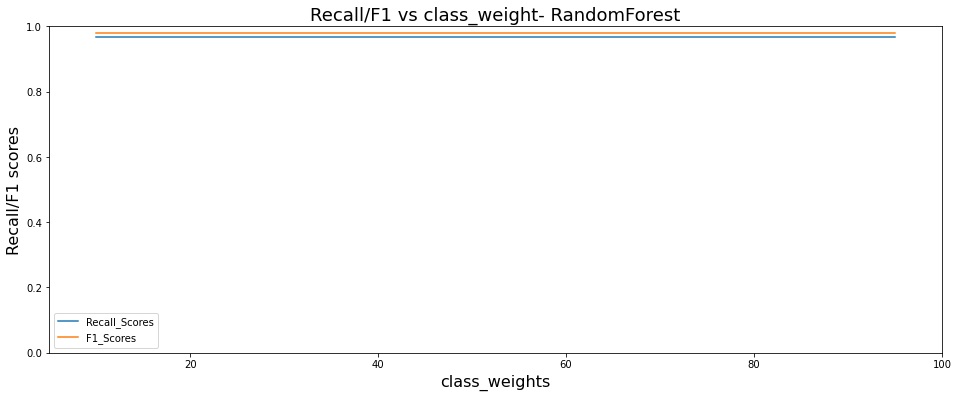

In [107]:
# Variation of Recall and F1 scores on the basis of class_weight

results_forest = pd.DataFrame(results_forest,columns=["weights","Recall","F1"])

plt.figure(figsize=(16,6))
plt.title('Recall/F1 vs class_weight- RandomForest', fontsize=18)
plt.plot(results_forest['weights'], results_forest['Recall'], label='Recall_Scores')
plt.plot(results_forest['weights'], results_forest['F1'], label='F1_Scores')  
plt.axis([5, 100, 0, 1])
plt.xlabel('class_weights', fontsize=16)
plt.ylabel('Recall/F1 scores', fontsize=16)
plt.legend()
plt.show()



RandomForestClassifier recall and F1 scores are constant by increasing the weight of the class.

$\color{black}{\textit{On the test set RandomForestClassifier with parameters :{'class_weight': {0: 1, 1: 20},'criterion': 'gini','max_depth':10,
 'n_estimators': 100}} \\ \textit{is giving best result. Next we will plot confusion matrix to validate our finding.}}$

[[2480    1]
 [   4  119]]


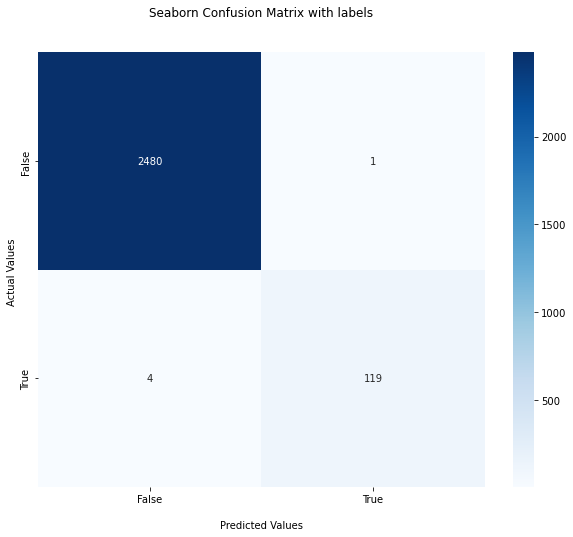

In [108]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, forest_clf.predict(X_test))

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".0f")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



## 5. Models Comparison : ROC and Precision/Recall Curve

1. *ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using    different probability thresholds.*
2. *Precision-Recall curves summarize the trade-off between the true positive rate and the positive predicted value for a predictive model using different probability thresholds.*
3. *ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.*

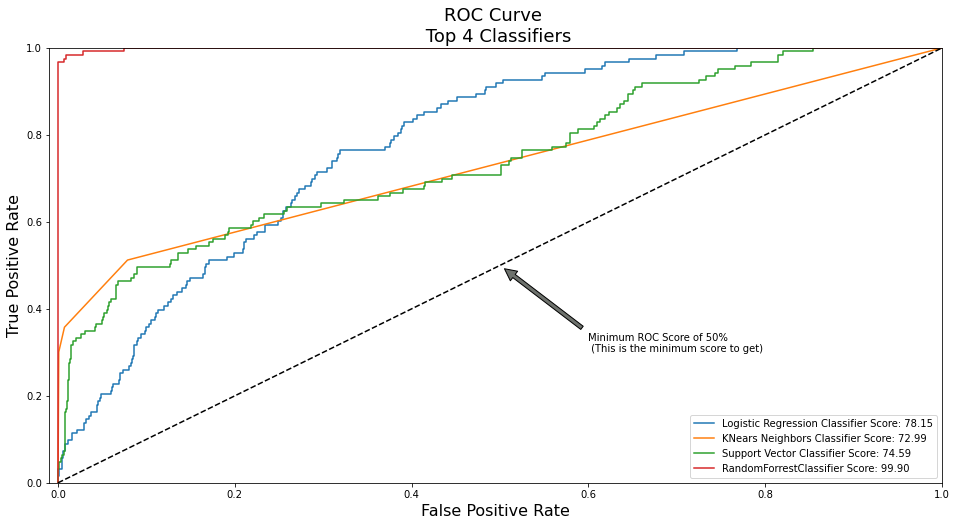

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the fpr and tpr for all thresholds of the classification
# LogisticRegression

log_pred = grid_logistic.predict_proba(X_test)[:,1]
knn_pred = grid_KNN.predict_proba(X_test)[:,1]
svc_pred = grid_SVC.predict_proba(X_test)[:,1]
forest_pred = forest_clf.predict_proba(X_test)[:,1]

log_fpr,log_tpr,log_threshold  = roc_curve(y_test,log_pred)
knn_fpr,knn_tpr,knn_threshold  = roc_curve(y_test,knn_pred)
svc_fpr,svc_tpr,svc_threshold  = roc_curve(y_test,svc_pred)
forest_fpr,forest_tpr,forest_threshold  = roc_curve(y_test,forest_pred)

def ROC_curve_multi(log_fpr,log_tpr,knn_fpr,knn_tpr,svc_fpr,svc_tpr,forest_fpr,forest_tpr):
    
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.2f}'.format(roc_auc_score(y_test, log_pred)*100))
    plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score: {:.2f}'.format(roc_auc_score(y_test, knn_pred)*100))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.2f}'.format(roc_auc_score(y_test, svc_pred)*100))
    plt.plot(forest_fpr, forest_tpr, label='RandomForrestClassifier Score: {:.2f}'.format(roc_auc_score(y_test, forest_pred)*100))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()


ROC_curve_multi(log_fpr, log_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, forest_fpr, forest_tpr)
plt.show()



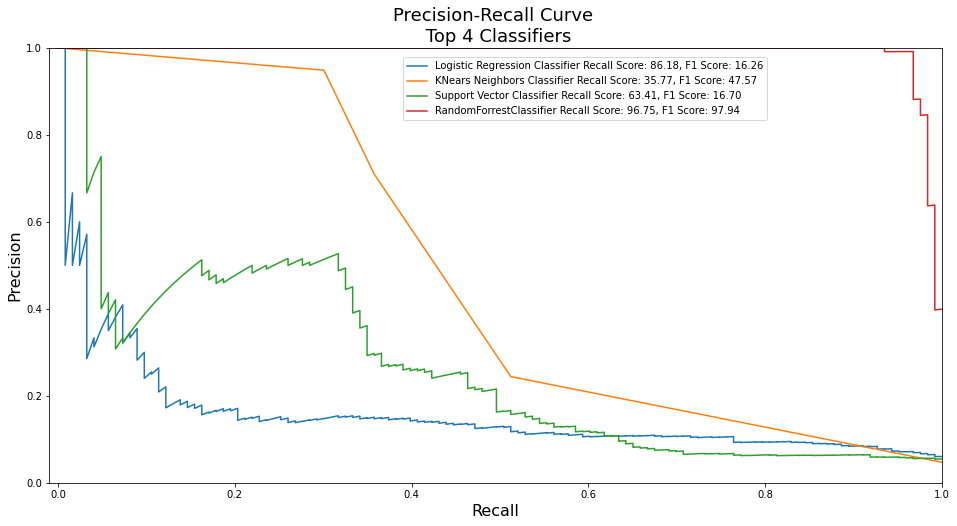

In [118]:
from sklearn.metrics import precision_recall_curve

log_pre,log_rec,log_threshold  = precision_recall_curve(y_test,log_pred)
knn_pre,knn_rec,knn_threshold  = precision_recall_curve(y_test,knn_pred)
svc_pre,svc_rec,svc_threshold  = precision_recall_curve(y_test,svc_pred)
forest_pre,forest_rec,forest_threshold  = precision_recall_curve(y_test,forest_pred)


def Precision_Recall_curve_multi(log_fpr,log_tpr,knn_fpr,knn_tpr,svc_fpr,svc_tpr,forest_fpr,forest_tpr):
    
    plt.figure(figsize=(16,8))
    plt.title('Precision-Recall Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_rec,log_pre, label='Logistic Regression Classifier Recall Score: {:.2f}, F1 Score: {:.2f}'
             .format(recall_score(y_test,grid_logistic.predict(X_test))*100,f1_score(y_test,grid_logistic.predict(X_test))*100))
    plt.plot(knn_rec, knn_pre, label='KNears Neighbors Classifier Recall Score: {:.2f}, F1 Score: {:.2f}'
             .format(recall_score(y_test,grid_KNN.predict(X_test))*100,f1_score(y_test,grid_KNN.predict(X_test))*100))
    plt.plot(svc_rec, svc_pre, label='Support Vector Classifier Recall Score: {:.2f}, F1 Score: {:.2f}'
             .format(recall_score(y_test,grid_SVC.predict(X_test))*100,f1_score(y_test,grid_SVC.predict(X_test))*100))
    plt.plot(forest_rec, forest_pre, label='RandomForrestClassifier Recall Score: {:.2f}, F1 Score: {:.2f}'
             .format(recall_score(y_test,forest_clf.predict(X_test))*100,f1_score(y_test,forest_clf.predict(X_test))*100))
    
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.legend(loc = 'upper center',bbox_to_anchor =(0.6,0.99) )


Precision_Recall_curve_multi(log_pre,log_rec,knn_pre,knn_rec,svc_pre,svc_rec,forest_pre,forest_rec)
plt.show()

## Discussion on Model Selection and Results: Proposed Classifier for Bankruptcy

As stated in the previos sections, the main points found during the analysis are the following:
- In terms of data pre-processing, the dataset resulting from replacing missing data with the median (because of highly skewed data), deleting duplicates and replacing outliers by the maximum/minimum IQR values prove to provide more information for building different type of classifiers.
- It was found that only 10 features (out of the intial 64) are sufficient to confidently predict the response variable. These features are: **'Attr6', 'Attr15', 'Attr20', 'Attr23', 'Attr27','Attr39','Attr41','Attr59','Attr61' and 'Attr64'.**
- Assessing the different kinds of classifiers, **the best performance was obtained by training a Random Forest Classifier**.
- This can be observed when comparing SVCs, Logits, KNNs and the Random Forests Classifiers in the ROC/AUC analysis.
- The trained Random Forest Classifier, is characterized by the following hyperparameters:
    - Class_weight: {0: 1, 1: 20},
    - Criterion: gini,
    - max_depth: 10,
    - n_estimators: 100
- The maximum perfomance is at:
    - Recall Score of 99.6 % on training set,
    - Recall Score of 97% on test set.
    - F1 Score 98%
- According to the results, the classifier don't exhibit overfitting, and the variance-bias is well traded.
- **This Random-Forest-Based classifier is recommended to be deployed, and be used into predicting bankruptcy for different companies**.
- It is of knowledge, that the Random-Forests-Classifiers cannot extrapolate beyond the limits of the database base on which it was trained. Nonetheless, based on the proposed outlier approach, this is expected to be handled by the models methodology.

## 5. Re-Training Final Classifier - To Deployment

RandomForestClassifier with parameters :
{'class_weight': {0: 1, 1: 20},'criterion': 'entropy','max_depth':10, 'n_estimators': 100}


In [119]:
df_model = Bdata[features_10].copy(deep=True)

y_all = df_model["class"]
x_all = df_model.loc[:,df_model.columns != "class"]

In [121]:
final_model_production = RandomForestClassifier(n_estimators = 100, max_depth = 10, criterion='gini', class_weight={0: 1, 1: 20}, random_state = 42)
final_model_production.fit(x_all,y_all)

RandomForestClassifier(class_weight={0: 1, 1: 20}, max_depth=10,
                       random_state=42)